In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from resblock import G_ResidualBlock
from resblock import D_ResidualBlock
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from dataloaders import get_mnist_dataloaders, get_cifar_dataloaders
from model import Discriminator
train_loader, val_loader = get_cifar_dataloaders(batch_size = 64)

### For Plot
import matplotlib.pyplot as plt
import numpy as np

class Net(nn.Module):

  def __init__(self, in_channels=3, out_channels=10):

    super(Net,self).__init__()

    self.res1 = D_ResidualBlock(in_channels, 128, downsample=True, first_block=True)
    self.res2 = D_ResidualBlock(128, 128, downsample=True)
    self.res3 = D_ResidualBlock(128, 128)
    self.res4 = D_ResidualBlock(128, 128)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax()
    
    self.fc = nn.Linear(128, out_channels)

  def forward(self,x):
    x = self.res1(x)
    x = self.res2(x)
    x = self.res3(x)
    x = self.res4(x)
    x = self.relu(x)
    x = torch.sum(x, dim=(2, 3))

    x = self.fc(x)

    return F.log_softmax(x)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


c:\code\python\python37\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch:1 [0/50000 (0%)]	Loss: 27.432045
Train Epoch:1 [640/50000 (1%)]	Loss: 2.782894
Train Epoch:1 [1280/50000 (3%)]	Loss: 2.398645
Train Epoch:1 [1920/50000 (4%)]	Loss: 2.243637
Train Epoch:1 [2560/50000 (5%)]	Loss: 2.364619
Train Epoch:1 [3200/50000 (6%)]	Loss: 2.306474
Train Epoch:1 [3840/50000 (8%)]	Loss: 2.219815
Train Epoch:1 [4480/50000 (9%)]	Loss: 2.187087
Train Epoch:1 [5120/50000 (10%)]	Loss: 2.208421
Train Epoch:1 [5760/50000 (12%)]	Loss: 2.114320
Train Epoch:1 [6400/50000 (13%)]	Loss: 2.217921
Train Epoch:1 [7040/50000 (14%)]	Loss: 2.138216
Train Epoch:1 [7680/50000 (15%)]	Loss: 2.012570
Train Epoch:1 [8320/50000 (17%)]	Loss: 2.219977
Train Epoch:1 [8960/50000 (18%)]	Loss: 2.178307
Train Epoch:1 [9600/50000 (19%)]	Loss: 2.190197
Train Epoch:1 [10240/50000 (20%)]	Loss: 2.163423
Train Epoch:1 [10880/50000 (22%)]	Loss: 2.094605
Train Epoch:1 [11520/50000 (23%)]	Loss: 2.228405
Train Epoch:1 [12160/50000 (24%)]	Loss: 2.112955
Train Epoch:1 [12800/50000 (26%)]	Loss: 2.27544

c:\code\python\python37\lib\site-packages\ipykernel_launcher.py:44: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
c:\code\python\python37\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Validation set: Average loss: 1.9630, Accuracy: 2408/10000 (24%)



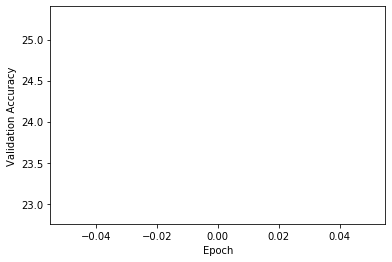


Saved model to model_1.pth. You can run `python evaluate.py --modelmodel_1.pth` to generate the Kaggle formatted csv file
Train Epoch:2 [0/50000 (0%)]	Loss: 2.081099
Train Epoch:2 [640/50000 (1%)]	Loss: 1.901315
Train Epoch:2 [1280/50000 (3%)]	Loss: 1.983425
Train Epoch:2 [1920/50000 (4%)]	Loss: 1.957683
Train Epoch:2 [2560/50000 (5%)]	Loss: 2.000579
Train Epoch:2 [3200/50000 (6%)]	Loss: 1.899886
Train Epoch:2 [3840/50000 (8%)]	Loss: 1.901273
Train Epoch:2 [4480/50000 (9%)]	Loss: 1.865443
Train Epoch:2 [5120/50000 (10%)]	Loss: 1.887190
Train Epoch:2 [5760/50000 (12%)]	Loss: 2.024954
Train Epoch:2 [6400/50000 (13%)]	Loss: 1.814149
Train Epoch:2 [7040/50000 (14%)]	Loss: 2.006360
Train Epoch:2 [7680/50000 (15%)]	Loss: 1.863303
Train Epoch:2 [8320/50000 (17%)]	Loss: 2.175120
Train Epoch:2 [8960/50000 (18%)]	Loss: 1.829802
Train Epoch:2 [9600/50000 (19%)]	Loss: 1.834043
Train Epoch:2 [10240/50000 (20%)]	Loss: 1.967959
Train Epoch:2 [10880/50000 (22%)]	Loss: 1.819194
Train Epoch:2 [11520/50

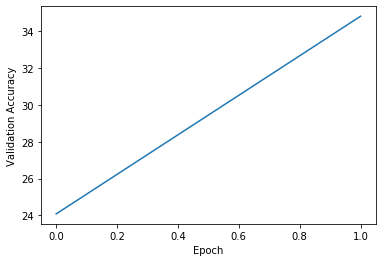


Saved model to model_2.pth. You can run `python evaluate.py --modelmodel_2.pth` to generate the Kaggle formatted csv file
Train Epoch:3 [0/50000 (0%)]	Loss: 1.575909
Train Epoch:3 [640/50000 (1%)]	Loss: 1.756718
Train Epoch:3 [1280/50000 (3%)]	Loss: 1.851682
Train Epoch:3 [1920/50000 (4%)]	Loss: 1.751251
Train Epoch:3 [2560/50000 (5%)]	Loss: 1.771780
Train Epoch:3 [3200/50000 (6%)]	Loss: 1.678960
Train Epoch:3 [3840/50000 (8%)]	Loss: 1.656892
Train Epoch:3 [4480/50000 (9%)]	Loss: 1.838797
Train Epoch:3 [5120/50000 (10%)]	Loss: 1.797372
Train Epoch:3 [5760/50000 (12%)]	Loss: 1.652928
Train Epoch:3 [6400/50000 (13%)]	Loss: 1.706044
Train Epoch:3 [7040/50000 (14%)]	Loss: 1.607030
Train Epoch:3 [7680/50000 (15%)]	Loss: 1.427439
Train Epoch:3 [8320/50000 (17%)]	Loss: 1.679752
Train Epoch:3 [8960/50000 (18%)]	Loss: 1.707182
Train Epoch:3 [9600/50000 (19%)]	Loss: 1.609494
Train Epoch:3 [10240/50000 (20%)]	Loss: 1.703857
Train Epoch:3 [10880/50000 (22%)]	Loss: 1.661052
Train Epoch:3 [11520/50

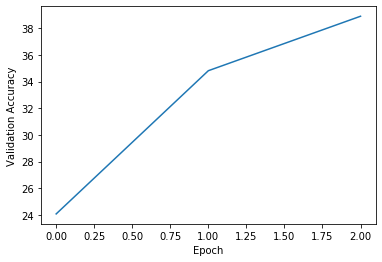


Saved model to model_3.pth. You can run `python evaluate.py --modelmodel_3.pth` to generate the Kaggle formatted csv file
Train Epoch:4 [0/50000 (0%)]	Loss: 1.604881
Train Epoch:4 [640/50000 (1%)]	Loss: 1.837557
Train Epoch:4 [1280/50000 (3%)]	Loss: 1.723418
Train Epoch:4 [1920/50000 (4%)]	Loss: 1.574114
Train Epoch:4 [2560/50000 (5%)]	Loss: 1.523610
Train Epoch:4 [3200/50000 (6%)]	Loss: 1.528888
Train Epoch:4 [3840/50000 (8%)]	Loss: 1.701726
Train Epoch:4 [4480/50000 (9%)]	Loss: 1.766757
Train Epoch:4 [5120/50000 (10%)]	Loss: 1.608951
Train Epoch:4 [5760/50000 (12%)]	Loss: 1.760015
Train Epoch:4 [6400/50000 (13%)]	Loss: 1.686271
Train Epoch:4 [7040/50000 (14%)]	Loss: 1.533442
Train Epoch:4 [7680/50000 (15%)]	Loss: 1.602253
Train Epoch:4 [8320/50000 (17%)]	Loss: 1.543422
Train Epoch:4 [8960/50000 (18%)]	Loss: 1.478281
Train Epoch:4 [9600/50000 (19%)]	Loss: 1.523418
Train Epoch:4 [10240/50000 (20%)]	Loss: 1.672353
Train Epoch:4 [10880/50000 (22%)]	Loss: 1.629760
Train Epoch:4 [11520/50

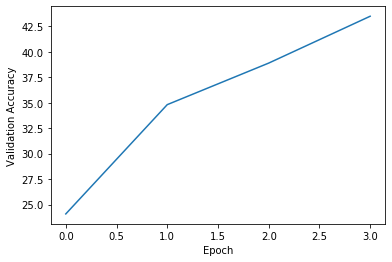


Saved model to model_4.pth. You can run `python evaluate.py --modelmodel_4.pth` to generate the Kaggle formatted csv file
Train Epoch:5 [0/50000 (0%)]	Loss: 1.373119
Train Epoch:5 [640/50000 (1%)]	Loss: 1.481358
Train Epoch:5 [1280/50000 (3%)]	Loss: 1.482508
Train Epoch:5 [1920/50000 (4%)]	Loss: 1.739599
Train Epoch:5 [2560/50000 (5%)]	Loss: 1.648787
Train Epoch:5 [3200/50000 (6%)]	Loss: 1.588539
Train Epoch:5 [3840/50000 (8%)]	Loss: 1.625278
Train Epoch:5 [4480/50000 (9%)]	Loss: 1.509290
Train Epoch:5 [5120/50000 (10%)]	Loss: 1.513460
Train Epoch:5 [5760/50000 (12%)]	Loss: 1.612951
Train Epoch:5 [6400/50000 (13%)]	Loss: 1.417615
Train Epoch:5 [7040/50000 (14%)]	Loss: 1.473728
Train Epoch:5 [7680/50000 (15%)]	Loss: 1.555413
Train Epoch:5 [8320/50000 (17%)]	Loss: 1.406259
Train Epoch:5 [8960/50000 (18%)]	Loss: 1.487671
Train Epoch:5 [9600/50000 (19%)]	Loss: 1.674527
Train Epoch:5 [10240/50000 (20%)]	Loss: 1.492629
Train Epoch:5 [10880/50000 (22%)]	Loss: 1.386698
Train Epoch:5 [11520/50

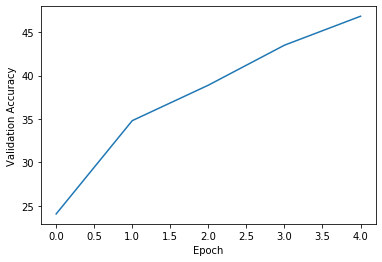


Saved model to model_5.pth. You can run `python evaluate.py --modelmodel_5.pth` to generate the Kaggle formatted csv file
Train Epoch:6 [0/50000 (0%)]	Loss: 1.524108
Train Epoch:6 [640/50000 (1%)]	Loss: 1.566989
Train Epoch:6 [1280/50000 (3%)]	Loss: 1.344560
Train Epoch:6 [1920/50000 (4%)]	Loss: 1.425010
Train Epoch:6 [2560/50000 (5%)]	Loss: 1.454236
Train Epoch:6 [3200/50000 (6%)]	Loss: 1.594335
Train Epoch:6 [3840/50000 (8%)]	Loss: 1.423520
Train Epoch:6 [4480/50000 (9%)]	Loss: 1.400853
Train Epoch:6 [5120/50000 (10%)]	Loss: 1.456592
Train Epoch:6 [5760/50000 (12%)]	Loss: 1.413987
Train Epoch:6 [6400/50000 (13%)]	Loss: 1.331528
Train Epoch:6 [7040/50000 (14%)]	Loss: 1.258900
Train Epoch:6 [7680/50000 (15%)]	Loss: 1.398727
Train Epoch:6 [8320/50000 (17%)]	Loss: 1.404327
Train Epoch:6 [8960/50000 (18%)]	Loss: 1.170254
Train Epoch:6 [9600/50000 (19%)]	Loss: 1.444412
Train Epoch:6 [10240/50000 (20%)]	Loss: 1.698389
Train Epoch:6 [10880/50000 (22%)]	Loss: 1.492942
Train Epoch:6 [11520/50

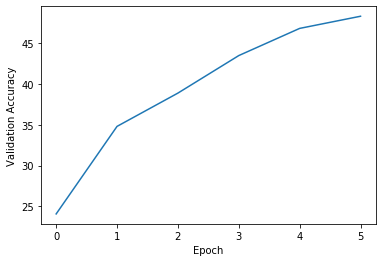


Saved model to model_6.pth. You can run `python evaluate.py --modelmodel_6.pth` to generate the Kaggle formatted csv file
Train Epoch:7 [0/50000 (0%)]	Loss: 1.483690
Train Epoch:7 [640/50000 (1%)]	Loss: 1.316946
Train Epoch:7 [1280/50000 (3%)]	Loss: 1.501881
Train Epoch:7 [1920/50000 (4%)]	Loss: 1.390759
Train Epoch:7 [2560/50000 (5%)]	Loss: 1.241697
Train Epoch:7 [3200/50000 (6%)]	Loss: 1.289541
Train Epoch:7 [3840/50000 (8%)]	Loss: 1.380073
Train Epoch:7 [4480/50000 (9%)]	Loss: 1.232651
Train Epoch:7 [5120/50000 (10%)]	Loss: 1.430443
Train Epoch:7 [5760/50000 (12%)]	Loss: 1.210104
Train Epoch:7 [6400/50000 (13%)]	Loss: 1.213206
Train Epoch:7 [7040/50000 (14%)]	Loss: 1.357135
Train Epoch:7 [7680/50000 (15%)]	Loss: 1.366150
Train Epoch:7 [8320/50000 (17%)]	Loss: 1.315351
Train Epoch:7 [8960/50000 (18%)]	Loss: 1.437396
Train Epoch:7 [9600/50000 (19%)]	Loss: 1.392089
Train Epoch:7 [10240/50000 (20%)]	Loss: 1.598792
Train Epoch:7 [10880/50000 (22%)]	Loss: 1.274742
Train Epoch:7 [11520/50

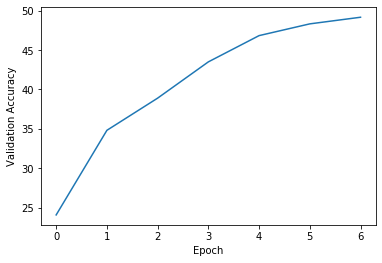


Saved model to model_7.pth. You can run `python evaluate.py --modelmodel_7.pth` to generate the Kaggle formatted csv file
Train Epoch:8 [0/50000 (0%)]	Loss: 1.384315
Train Epoch:8 [640/50000 (1%)]	Loss: 1.548577
Train Epoch:8 [1280/50000 (3%)]	Loss: 1.119118
Train Epoch:8 [1920/50000 (4%)]	Loss: 1.139746
Train Epoch:8 [2560/50000 (5%)]	Loss: 1.440156
Train Epoch:8 [3200/50000 (6%)]	Loss: 1.341552
Train Epoch:8 [3840/50000 (8%)]	Loss: 1.335410
Train Epoch:8 [4480/50000 (9%)]	Loss: 1.406921
Train Epoch:8 [5120/50000 (10%)]	Loss: 1.212511
Train Epoch:8 [5760/50000 (12%)]	Loss: 1.383729
Train Epoch:8 [6400/50000 (13%)]	Loss: 1.260627
Train Epoch:8 [7040/50000 (14%)]	Loss: 1.485076
Train Epoch:8 [7680/50000 (15%)]	Loss: 1.414767
Train Epoch:8 [8320/50000 (17%)]	Loss: 1.211590
Train Epoch:8 [8960/50000 (18%)]	Loss: 1.604992
Train Epoch:8 [9600/50000 (19%)]	Loss: 1.317099
Train Epoch:8 [10240/50000 (20%)]	Loss: 1.278062
Train Epoch:8 [10880/50000 (22%)]	Loss: 1.516953
Train Epoch:8 [11520/50

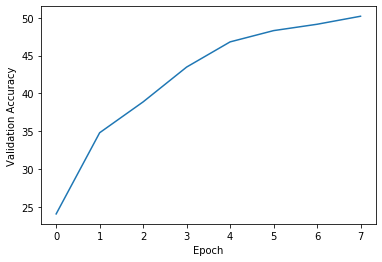


Saved model to model_8.pth. You can run `python evaluate.py --modelmodel_8.pth` to generate the Kaggle formatted csv file
Train Epoch:9 [0/50000 (0%)]	Loss: 1.381707
Train Epoch:9 [640/50000 (1%)]	Loss: 1.173494
Train Epoch:9 [1280/50000 (3%)]	Loss: 0.987053
Train Epoch:9 [1920/50000 (4%)]	Loss: 1.404562
Train Epoch:9 [2560/50000 (5%)]	Loss: 1.462035
Train Epoch:9 [3200/50000 (6%)]	Loss: 1.244491
Train Epoch:9 [3840/50000 (8%)]	Loss: 1.363185
Train Epoch:9 [4480/50000 (9%)]	Loss: 1.295266
Train Epoch:9 [5120/50000 (10%)]	Loss: 1.356804
Train Epoch:9 [5760/50000 (12%)]	Loss: 1.378518
Train Epoch:9 [6400/50000 (13%)]	Loss: 1.300208
Train Epoch:9 [7040/50000 (14%)]	Loss: 1.403109
Train Epoch:9 [7680/50000 (15%)]	Loss: 1.389396
Train Epoch:9 [8320/50000 (17%)]	Loss: 1.262995
Train Epoch:9 [8960/50000 (18%)]	Loss: 1.155313
Train Epoch:9 [9600/50000 (19%)]	Loss: 1.267926
Train Epoch:9 [10240/50000 (20%)]	Loss: 1.370450
Train Epoch:9 [10880/50000 (22%)]	Loss: 1.195863
Train Epoch:9 [11520/50

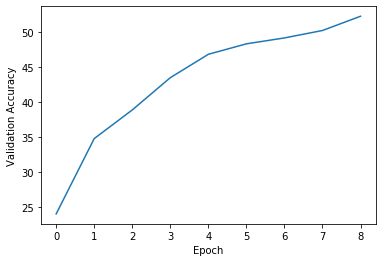


Saved model to model_9.pth. You can run `python evaluate.py --modelmodel_9.pth` to generate the Kaggle formatted csv file
Train Epoch:10 [0/50000 (0%)]	Loss: 1.136655
Train Epoch:10 [640/50000 (1%)]	Loss: 1.094045
Train Epoch:10 [1280/50000 (3%)]	Loss: 1.331541
Train Epoch:10 [1920/50000 (4%)]	Loss: 1.326322
Train Epoch:10 [2560/50000 (5%)]	Loss: 1.262439
Train Epoch:10 [3200/50000 (6%)]	Loss: 1.022732
Train Epoch:10 [3840/50000 (8%)]	Loss: 1.384296
Train Epoch:10 [4480/50000 (9%)]	Loss: 1.363284
Train Epoch:10 [5120/50000 (10%)]	Loss: 1.255131
Train Epoch:10 [5760/50000 (12%)]	Loss: 0.994102
Train Epoch:10 [6400/50000 (13%)]	Loss: 1.294894
Train Epoch:10 [7040/50000 (14%)]	Loss: 1.207247
Train Epoch:10 [7680/50000 (15%)]	Loss: 1.170646
Train Epoch:10 [8320/50000 (17%)]	Loss: 1.236808
Train Epoch:10 [8960/50000 (18%)]	Loss: 1.118613
Train Epoch:10 [9600/50000 (19%)]	Loss: 1.236830
Train Epoch:10 [10240/50000 (20%)]	Loss: 1.082985
Train Epoch:10 [10880/50000 (22%)]	Loss: 1.247891
Train

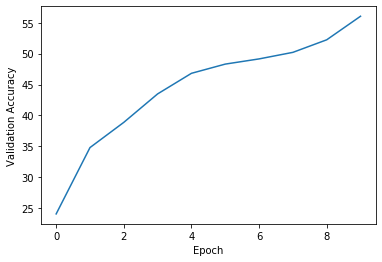


Saved model to model_10.pth. You can run `python evaluate.py --modelmodel_10.pth` to generate the Kaggle formatted csv file
Train Epoch:11 [0/50000 (0%)]	Loss: 1.106926
Train Epoch:11 [640/50000 (1%)]	Loss: 1.244237
Train Epoch:11 [1280/50000 (3%)]	Loss: 1.270716
Train Epoch:11 [1920/50000 (4%)]	Loss: 1.214783
Train Epoch:11 [2560/50000 (5%)]	Loss: 1.305410
Train Epoch:11 [3200/50000 (6%)]	Loss: 1.239813
Train Epoch:11 [3840/50000 (8%)]	Loss: 1.300191
Train Epoch:11 [4480/50000 (9%)]	Loss: 1.130563
Train Epoch:11 [5120/50000 (10%)]	Loss: 0.883287
Train Epoch:11 [5760/50000 (12%)]	Loss: 1.311164
Train Epoch:11 [6400/50000 (13%)]	Loss: 1.201808
Train Epoch:11 [7040/50000 (14%)]	Loss: 1.187767
Train Epoch:11 [7680/50000 (15%)]	Loss: 1.228022
Train Epoch:11 [8320/50000 (17%)]	Loss: 1.017837
Train Epoch:11 [8960/50000 (18%)]	Loss: 1.300110
Train Epoch:11 [9600/50000 (19%)]	Loss: 1.053182
Train Epoch:11 [10240/50000 (20%)]	Loss: 1.284176
Train Epoch:11 [10880/50000 (22%)]	Loss: 1.335585
Tra

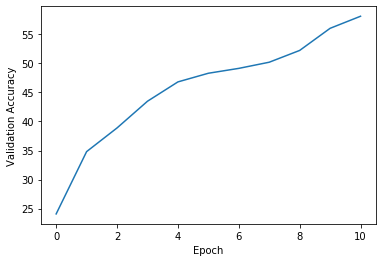


Saved model to model_11.pth. You can run `python evaluate.py --modelmodel_11.pth` to generate the Kaggle formatted csv file
Train Epoch:12 [0/50000 (0%)]	Loss: 0.968841
Train Epoch:12 [640/50000 (1%)]	Loss: 1.023675
Train Epoch:12 [1280/50000 (3%)]	Loss: 1.245236
Train Epoch:12 [1920/50000 (4%)]	Loss: 0.930227
Train Epoch:12 [2560/50000 (5%)]	Loss: 1.150196
Train Epoch:12 [3200/50000 (6%)]	Loss: 1.221993
Train Epoch:12 [3840/50000 (8%)]	Loss: 1.061917
Train Epoch:12 [4480/50000 (9%)]	Loss: 1.376419
Train Epoch:12 [5120/50000 (10%)]	Loss: 1.364849
Train Epoch:12 [5760/50000 (12%)]	Loss: 1.210988
Train Epoch:12 [6400/50000 (13%)]	Loss: 1.315723
Train Epoch:12 [7040/50000 (14%)]	Loss: 1.334953
Train Epoch:12 [7680/50000 (15%)]	Loss: 1.139447
Train Epoch:12 [8320/50000 (17%)]	Loss: 1.202301
Train Epoch:12 [8960/50000 (18%)]	Loss: 1.292609
Train Epoch:12 [9600/50000 (19%)]	Loss: 1.207089
Train Epoch:12 [10240/50000 (20%)]	Loss: 1.242320
Train Epoch:12 [10880/50000 (22%)]	Loss: 1.363085
Tra

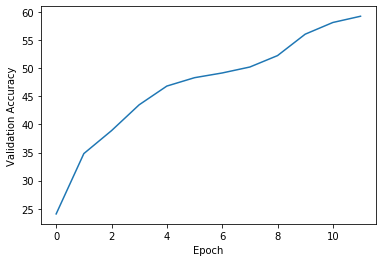


Saved model to model_12.pth. You can run `python evaluate.py --modelmodel_12.pth` to generate the Kaggle formatted csv file
Train Epoch:13 [0/50000 (0%)]	Loss: 1.074316
Train Epoch:13 [640/50000 (1%)]	Loss: 1.133393
Train Epoch:13 [1280/50000 (3%)]	Loss: 1.131511
Train Epoch:13 [1920/50000 (4%)]	Loss: 1.189701
Train Epoch:13 [2560/50000 (5%)]	Loss: 1.242409
Train Epoch:13 [3200/50000 (6%)]	Loss: 1.047389
Train Epoch:13 [3840/50000 (8%)]	Loss: 0.978009
Train Epoch:13 [4480/50000 (9%)]	Loss: 1.259396
Train Epoch:13 [5120/50000 (10%)]	Loss: 1.172431
Train Epoch:13 [5760/50000 (12%)]	Loss: 0.943444
Train Epoch:13 [6400/50000 (13%)]	Loss: 1.392843
Train Epoch:13 [7040/50000 (14%)]	Loss: 1.017190
Train Epoch:13 [7680/50000 (15%)]	Loss: 1.015612
Train Epoch:13 [8320/50000 (17%)]	Loss: 1.031152
Train Epoch:13 [8960/50000 (18%)]	Loss: 1.190546
Train Epoch:13 [9600/50000 (19%)]	Loss: 1.008389
Train Epoch:13 [10240/50000 (20%)]	Loss: 0.920410
Train Epoch:13 [10880/50000 (22%)]	Loss: 1.019582
Tra

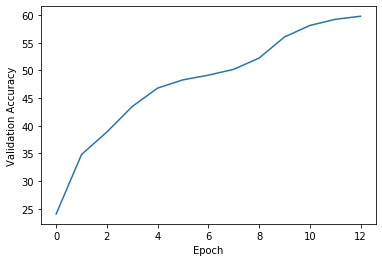


Saved model to model_13.pth. You can run `python evaluate.py --modelmodel_13.pth` to generate the Kaggle formatted csv file
Train Epoch:14 [0/50000 (0%)]	Loss: 1.431628
Train Epoch:14 [640/50000 (1%)]	Loss: 1.410525
Train Epoch:14 [1280/50000 (3%)]	Loss: 1.282519
Train Epoch:14 [1920/50000 (4%)]	Loss: 0.815267
Train Epoch:14 [2560/50000 (5%)]	Loss: 0.860304
Train Epoch:14 [3200/50000 (6%)]	Loss: 1.037899
Train Epoch:14 [3840/50000 (8%)]	Loss: 0.861554
Train Epoch:14 [4480/50000 (9%)]	Loss: 1.306592
Train Epoch:14 [5120/50000 (10%)]	Loss: 1.026693
Train Epoch:14 [5760/50000 (12%)]	Loss: 0.912859
Train Epoch:14 [6400/50000 (13%)]	Loss: 1.071858
Train Epoch:14 [7040/50000 (14%)]	Loss: 1.268657
Train Epoch:14 [7680/50000 (15%)]	Loss: 0.958980
Train Epoch:14 [8320/50000 (17%)]	Loss: 1.132117
Train Epoch:14 [8960/50000 (18%)]	Loss: 1.147862
Train Epoch:14 [9600/50000 (19%)]	Loss: 1.315254
Train Epoch:14 [10240/50000 (20%)]	Loss: 1.113535
Train Epoch:14 [10880/50000 (22%)]	Loss: 1.289012
Tra

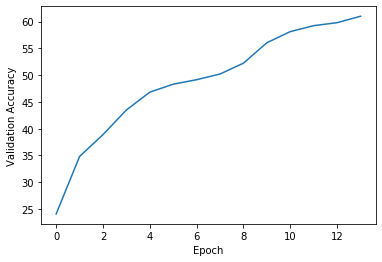


Saved model to model_14.pth. You can run `python evaluate.py --modelmodel_14.pth` to generate the Kaggle formatted csv file
Train Epoch:15 [0/50000 (0%)]	Loss: 1.116800
Train Epoch:15 [640/50000 (1%)]	Loss: 1.297666
Train Epoch:15 [1280/50000 (3%)]	Loss: 0.819637
Train Epoch:15 [1920/50000 (4%)]	Loss: 0.833440
Train Epoch:15 [2560/50000 (5%)]	Loss: 0.997292
Train Epoch:15 [3200/50000 (6%)]	Loss: 1.052664
Train Epoch:15 [3840/50000 (8%)]	Loss: 0.971791
Train Epoch:15 [4480/50000 (9%)]	Loss: 1.061640
Train Epoch:15 [5120/50000 (10%)]	Loss: 1.199233
Train Epoch:15 [5760/50000 (12%)]	Loss: 0.938443
Train Epoch:15 [6400/50000 (13%)]	Loss: 0.897011
Train Epoch:15 [7040/50000 (14%)]	Loss: 1.043869
Train Epoch:15 [7680/50000 (15%)]	Loss: 1.130368
Train Epoch:15 [8320/50000 (17%)]	Loss: 1.291421
Train Epoch:15 [8960/50000 (18%)]	Loss: 1.413126
Train Epoch:15 [9600/50000 (19%)]	Loss: 0.941073
Train Epoch:15 [10240/50000 (20%)]	Loss: 1.476303
Train Epoch:15 [10880/50000 (22%)]	Loss: 0.998404
Tra

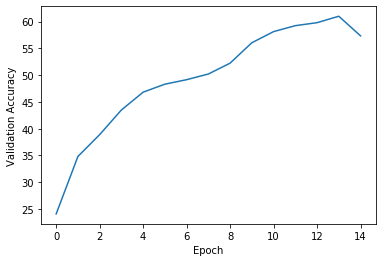


Saved model to model_15.pth. You can run `python evaluate.py --modelmodel_15.pth` to generate the Kaggle formatted csv file
Train Epoch:16 [0/50000 (0%)]	Loss: 1.178309
Train Epoch:16 [640/50000 (1%)]	Loss: 1.117760
Train Epoch:16 [1280/50000 (3%)]	Loss: 1.030989
Train Epoch:16 [1920/50000 (4%)]	Loss: 1.377143
Train Epoch:16 [2560/50000 (5%)]	Loss: 1.151630
Train Epoch:16 [3200/50000 (6%)]	Loss: 0.950864
Train Epoch:16 [3840/50000 (8%)]	Loss: 1.185724
Train Epoch:16 [4480/50000 (9%)]	Loss: 0.962610
Train Epoch:16 [5120/50000 (10%)]	Loss: 0.729849
Train Epoch:16 [5760/50000 (12%)]	Loss: 1.122745
Train Epoch:16 [6400/50000 (13%)]	Loss: 0.873227
Train Epoch:16 [7040/50000 (14%)]	Loss: 0.884795
Train Epoch:16 [7680/50000 (15%)]	Loss: 1.299327
Train Epoch:16 [8320/50000 (17%)]	Loss: 1.227534
Train Epoch:16 [8960/50000 (18%)]	Loss: 1.169520
Train Epoch:16 [9600/50000 (19%)]	Loss: 1.075547
Train Epoch:16 [10240/50000 (20%)]	Loss: 1.096027
Train Epoch:16 [10880/50000 (22%)]	Loss: 0.788211
Tra

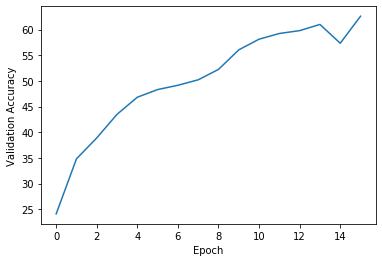


Saved model to model_16.pth. You can run `python evaluate.py --modelmodel_16.pth` to generate the Kaggle formatted csv file
Train Epoch:17 [0/50000 (0%)]	Loss: 1.069091
Train Epoch:17 [640/50000 (1%)]	Loss: 1.185106
Train Epoch:17 [1280/50000 (3%)]	Loss: 1.068500
Train Epoch:17 [1920/50000 (4%)]	Loss: 1.052188
Train Epoch:17 [2560/50000 (5%)]	Loss: 1.086909
Train Epoch:17 [3200/50000 (6%)]	Loss: 1.116772
Train Epoch:17 [3840/50000 (8%)]	Loss: 0.956175
Train Epoch:17 [4480/50000 (9%)]	Loss: 0.876820
Train Epoch:17 [5120/50000 (10%)]	Loss: 0.935165
Train Epoch:17 [5760/50000 (12%)]	Loss: 1.088034
Train Epoch:17 [6400/50000 (13%)]	Loss: 1.096877
Train Epoch:17 [7040/50000 (14%)]	Loss: 1.224207
Train Epoch:17 [7680/50000 (15%)]	Loss: 0.829282
Train Epoch:17 [8320/50000 (17%)]	Loss: 1.069767
Train Epoch:17 [8960/50000 (18%)]	Loss: 0.939193
Train Epoch:17 [9600/50000 (19%)]	Loss: 0.876547
Train Epoch:17 [10240/50000 (20%)]	Loss: 1.082903
Train Epoch:17 [10880/50000 (22%)]	Loss: 1.098478
Tra

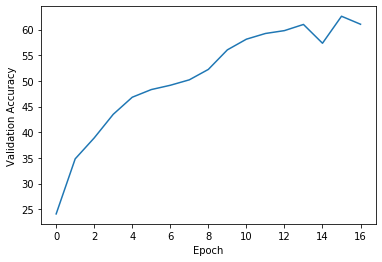


Saved model to model_17.pth. You can run `python evaluate.py --modelmodel_17.pth` to generate the Kaggle formatted csv file
Train Epoch:18 [0/50000 (0%)]	Loss: 0.986749
Train Epoch:18 [640/50000 (1%)]	Loss: 0.957666
Train Epoch:18 [1280/50000 (3%)]	Loss: 1.078205
Train Epoch:18 [1920/50000 (4%)]	Loss: 0.927166
Train Epoch:18 [2560/50000 (5%)]	Loss: 0.933535
Train Epoch:18 [3200/50000 (6%)]	Loss: 1.152028
Train Epoch:18 [3840/50000 (8%)]	Loss: 0.992123
Train Epoch:18 [4480/50000 (9%)]	Loss: 1.148828
Train Epoch:18 [5120/50000 (10%)]	Loss: 0.870488
Train Epoch:18 [5760/50000 (12%)]	Loss: 0.955865
Train Epoch:18 [6400/50000 (13%)]	Loss: 1.006355
Train Epoch:18 [7040/50000 (14%)]	Loss: 0.885120
Train Epoch:18 [7680/50000 (15%)]	Loss: 0.966603
Train Epoch:18 [8320/50000 (17%)]	Loss: 1.103364
Train Epoch:18 [8960/50000 (18%)]	Loss: 1.278643
Train Epoch:18 [9600/50000 (19%)]	Loss: 1.080137
Train Epoch:18 [10240/50000 (20%)]	Loss: 1.016310
Train Epoch:18 [10880/50000 (22%)]	Loss: 1.273574
Tra

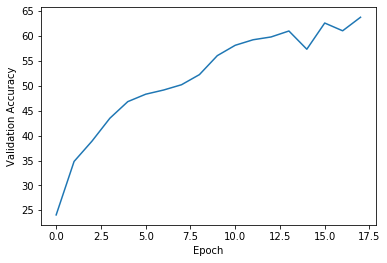


Saved model to model_18.pth. You can run `python evaluate.py --modelmodel_18.pth` to generate the Kaggle formatted csv file
Train Epoch:19 [0/50000 (0%)]	Loss: 1.004322
Train Epoch:19 [640/50000 (1%)]	Loss: 1.138926
Train Epoch:19 [1280/50000 (3%)]	Loss: 0.915419
Train Epoch:19 [1920/50000 (4%)]	Loss: 1.002874
Train Epoch:19 [2560/50000 (5%)]	Loss: 1.048825
Train Epoch:19 [3200/50000 (6%)]	Loss: 0.753419
Train Epoch:19 [3840/50000 (8%)]	Loss: 1.129396
Train Epoch:19 [4480/50000 (9%)]	Loss: 0.964563
Train Epoch:19 [5120/50000 (10%)]	Loss: 1.120260
Train Epoch:19 [5760/50000 (12%)]	Loss: 0.981051
Train Epoch:19 [6400/50000 (13%)]	Loss: 0.889880
Train Epoch:19 [7040/50000 (14%)]	Loss: 1.081102
Train Epoch:19 [7680/50000 (15%)]	Loss: 0.986206
Train Epoch:19 [8320/50000 (17%)]	Loss: 0.913463
Train Epoch:19 [8960/50000 (18%)]	Loss: 1.129280
Train Epoch:19 [9600/50000 (19%)]	Loss: 0.983435
Train Epoch:19 [10240/50000 (20%)]	Loss: 0.873876
Train Epoch:19 [10880/50000 (22%)]	Loss: 1.069819
Tra

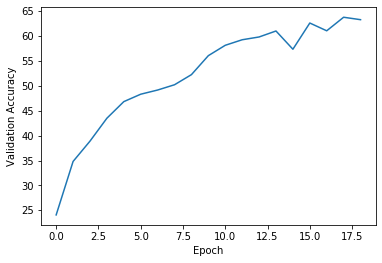


Saved model to model_19.pth. You can run `python evaluate.py --modelmodel_19.pth` to generate the Kaggle formatted csv file
Train Epoch:20 [0/50000 (0%)]	Loss: 0.919055
Train Epoch:20 [640/50000 (1%)]	Loss: 0.953788
Train Epoch:20 [1280/50000 (3%)]	Loss: 0.874427
Train Epoch:20 [1920/50000 (4%)]	Loss: 0.912522
Train Epoch:20 [2560/50000 (5%)]	Loss: 1.000668
Train Epoch:20 [3200/50000 (6%)]	Loss: 1.099209
Train Epoch:20 [3840/50000 (8%)]	Loss: 1.121753
Train Epoch:20 [4480/50000 (9%)]	Loss: 1.028029
Train Epoch:20 [5120/50000 (10%)]	Loss: 0.968854
Train Epoch:20 [5760/50000 (12%)]	Loss: 1.171035
Train Epoch:20 [6400/50000 (13%)]	Loss: 0.726464
Train Epoch:20 [7040/50000 (14%)]	Loss: 0.971356
Train Epoch:20 [7680/50000 (15%)]	Loss: 1.267630
Train Epoch:20 [8320/50000 (17%)]	Loss: 1.150679
Train Epoch:20 [8960/50000 (18%)]	Loss: 0.995475
Train Epoch:20 [9600/50000 (19%)]	Loss: 1.324381
Train Epoch:20 [10240/50000 (20%)]	Loss: 1.162922
Train Epoch:20 [10880/50000 (22%)]	Loss: 1.003745
Tra

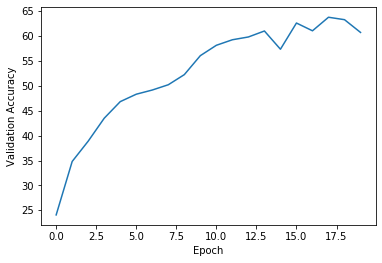


Saved model to model_20.pth. You can run `python evaluate.py --modelmodel_20.pth` to generate the Kaggle formatted csv file
Train Epoch:21 [0/50000 (0%)]	Loss: 0.971339
Train Epoch:21 [640/50000 (1%)]	Loss: 1.183306
Train Epoch:21 [1280/50000 (3%)]	Loss: 1.240775
Train Epoch:21 [1920/50000 (4%)]	Loss: 0.868461
Train Epoch:21 [2560/50000 (5%)]	Loss: 0.957287
Train Epoch:21 [3200/50000 (6%)]	Loss: 0.943306
Train Epoch:21 [3840/50000 (8%)]	Loss: 1.091871
Train Epoch:21 [4480/50000 (9%)]	Loss: 0.960077
Train Epoch:21 [5120/50000 (10%)]	Loss: 0.976569
Train Epoch:21 [5760/50000 (12%)]	Loss: 0.770903
Train Epoch:21 [6400/50000 (13%)]	Loss: 0.999730
Train Epoch:21 [7040/50000 (14%)]	Loss: 1.135039
Train Epoch:21 [7680/50000 (15%)]	Loss: 1.009980
Train Epoch:21 [8320/50000 (17%)]	Loss: 1.010057
Train Epoch:21 [8960/50000 (18%)]	Loss: 0.804109
Train Epoch:21 [9600/50000 (19%)]	Loss: 1.105425
Train Epoch:21 [10240/50000 (20%)]	Loss: 0.949032
Train Epoch:21 [10880/50000 (22%)]	Loss: 1.050189
Tra

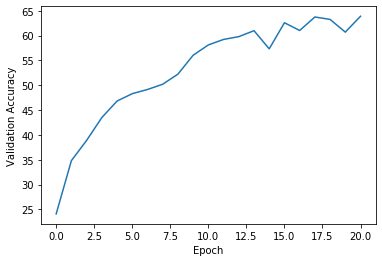


Saved model to model_21.pth. You can run `python evaluate.py --modelmodel_21.pth` to generate the Kaggle formatted csv file
Train Epoch:22 [0/50000 (0%)]	Loss: 0.898148
Train Epoch:22 [640/50000 (1%)]	Loss: 1.146612
Train Epoch:22 [1280/50000 (3%)]	Loss: 0.979001
Train Epoch:22 [1920/50000 (4%)]	Loss: 0.917790
Train Epoch:22 [2560/50000 (5%)]	Loss: 1.046535
Train Epoch:22 [3200/50000 (6%)]	Loss: 0.845654
Train Epoch:22 [3840/50000 (8%)]	Loss: 1.168616
Train Epoch:22 [4480/50000 (9%)]	Loss: 0.993701
Train Epoch:22 [5120/50000 (10%)]	Loss: 0.901318
Train Epoch:22 [5760/50000 (12%)]	Loss: 0.929235
Train Epoch:22 [6400/50000 (13%)]	Loss: 1.059839
Train Epoch:22 [7040/50000 (14%)]	Loss: 0.857995
Train Epoch:22 [7680/50000 (15%)]	Loss: 1.016444
Train Epoch:22 [8320/50000 (17%)]	Loss: 0.907268
Train Epoch:22 [8960/50000 (18%)]	Loss: 1.011420
Train Epoch:22 [9600/50000 (19%)]	Loss: 0.770542
Train Epoch:22 [10240/50000 (20%)]	Loss: 1.122394
Train Epoch:22 [10880/50000 (22%)]	Loss: 0.763595
Tra

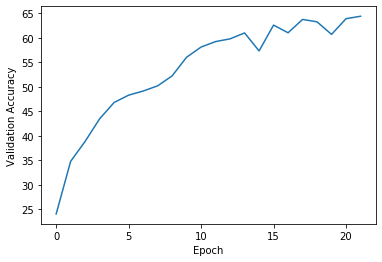


Saved model to model_22.pth. You can run `python evaluate.py --modelmodel_22.pth` to generate the Kaggle formatted csv file
Train Epoch:23 [0/50000 (0%)]	Loss: 1.060621
Train Epoch:23 [640/50000 (1%)]	Loss: 0.811842
Train Epoch:23 [1280/50000 (3%)]	Loss: 0.952731
Train Epoch:23 [1920/50000 (4%)]	Loss: 0.936383
Train Epoch:23 [2560/50000 (5%)]	Loss: 1.173004
Train Epoch:23 [3200/50000 (6%)]	Loss: 0.888667
Train Epoch:23 [3840/50000 (8%)]	Loss: 1.049307
Train Epoch:23 [4480/50000 (9%)]	Loss: 0.746970
Train Epoch:23 [5120/50000 (10%)]	Loss: 0.986075
Train Epoch:23 [5760/50000 (12%)]	Loss: 0.875356
Train Epoch:23 [6400/50000 (13%)]	Loss: 1.135709
Train Epoch:23 [7040/50000 (14%)]	Loss: 0.914660
Train Epoch:23 [7680/50000 (15%)]	Loss: 0.840320
Train Epoch:23 [8320/50000 (17%)]	Loss: 0.996670
Train Epoch:23 [8960/50000 (18%)]	Loss: 0.804823
Train Epoch:23 [9600/50000 (19%)]	Loss: 0.935767
Train Epoch:23 [10240/50000 (20%)]	Loss: 0.889581
Train Epoch:23 [10880/50000 (22%)]	Loss: 0.936131
Tra

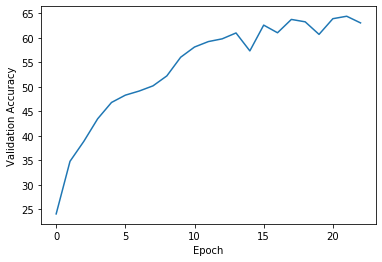


Saved model to model_23.pth. You can run `python evaluate.py --modelmodel_23.pth` to generate the Kaggle formatted csv file
Train Epoch:24 [0/50000 (0%)]	Loss: 0.970914
Train Epoch:24 [640/50000 (1%)]	Loss: 0.862778
Train Epoch:24 [1280/50000 (3%)]	Loss: 1.038090
Train Epoch:24 [1920/50000 (4%)]	Loss: 0.955187
Train Epoch:24 [2560/50000 (5%)]	Loss: 0.741412
Train Epoch:24 [3200/50000 (6%)]	Loss: 1.045936
Train Epoch:24 [3840/50000 (8%)]	Loss: 0.788585
Train Epoch:24 [4480/50000 (9%)]	Loss: 1.022636
Train Epoch:24 [5120/50000 (10%)]	Loss: 0.869354
Train Epoch:24 [5760/50000 (12%)]	Loss: 1.033680
Train Epoch:24 [6400/50000 (13%)]	Loss: 1.214162
Train Epoch:24 [7040/50000 (14%)]	Loss: 1.072888
Train Epoch:24 [7680/50000 (15%)]	Loss: 0.622383
Train Epoch:24 [8320/50000 (17%)]	Loss: 0.769428
Train Epoch:24 [8960/50000 (18%)]	Loss: 0.928334
Train Epoch:24 [9600/50000 (19%)]	Loss: 1.038269
Train Epoch:24 [10240/50000 (20%)]	Loss: 0.970192
Train Epoch:24 [10880/50000 (22%)]	Loss: 0.784688
Tra

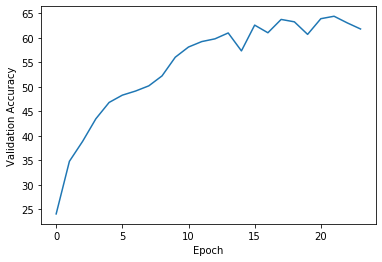


Saved model to model_24.pth. You can run `python evaluate.py --modelmodel_24.pth` to generate the Kaggle formatted csv file
Train Epoch:25 [0/50000 (0%)]	Loss: 1.070068
Train Epoch:25 [640/50000 (1%)]	Loss: 1.052918
Train Epoch:25 [1280/50000 (3%)]	Loss: 0.780576
Train Epoch:25 [1920/50000 (4%)]	Loss: 0.886169
Train Epoch:25 [2560/50000 (5%)]	Loss: 0.643432
Train Epoch:25 [3200/50000 (6%)]	Loss: 0.701567
Train Epoch:25 [3840/50000 (8%)]	Loss: 0.803142
Train Epoch:25 [4480/50000 (9%)]	Loss: 0.936115
Train Epoch:25 [5120/50000 (10%)]	Loss: 0.930717
Train Epoch:25 [5760/50000 (12%)]	Loss: 1.057354
Train Epoch:25 [6400/50000 (13%)]	Loss: 0.735142
Train Epoch:25 [7040/50000 (14%)]	Loss: 1.036675
Train Epoch:25 [7680/50000 (15%)]	Loss: 1.253583
Train Epoch:25 [8320/50000 (17%)]	Loss: 0.811228
Train Epoch:25 [8960/50000 (18%)]	Loss: 0.707890
Train Epoch:25 [9600/50000 (19%)]	Loss: 0.999043
Train Epoch:25 [10240/50000 (20%)]	Loss: 0.812660
Train Epoch:25 [10880/50000 (22%)]	Loss: 0.715056
Tra

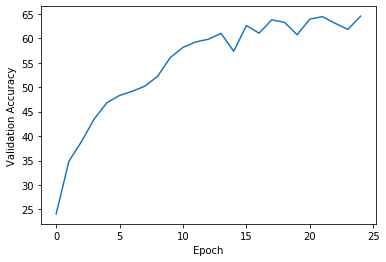


Saved model to model_25.pth. You can run `python evaluate.py --modelmodel_25.pth` to generate the Kaggle formatted csv file
Train Epoch:26 [0/50000 (0%)]	Loss: 1.064710
Train Epoch:26 [640/50000 (1%)]	Loss: 0.775713
Train Epoch:26 [1280/50000 (3%)]	Loss: 0.852621
Train Epoch:26 [1920/50000 (4%)]	Loss: 1.133771
Train Epoch:26 [2560/50000 (5%)]	Loss: 0.984156
Train Epoch:26 [3200/50000 (6%)]	Loss: 1.005524
Train Epoch:26 [3840/50000 (8%)]	Loss: 0.955699
Train Epoch:26 [4480/50000 (9%)]	Loss: 0.780117
Train Epoch:26 [5120/50000 (10%)]	Loss: 0.960477
Train Epoch:26 [5760/50000 (12%)]	Loss: 0.746029
Train Epoch:26 [6400/50000 (13%)]	Loss: 0.960478
Train Epoch:26 [7040/50000 (14%)]	Loss: 1.111035
Train Epoch:26 [7680/50000 (15%)]	Loss: 0.863717
Train Epoch:26 [8320/50000 (17%)]	Loss: 0.839194
Train Epoch:26 [8960/50000 (18%)]	Loss: 0.986807
Train Epoch:26 [9600/50000 (19%)]	Loss: 0.929400
Train Epoch:26 [10240/50000 (20%)]	Loss: 1.139911
Train Epoch:26 [10880/50000 (22%)]	Loss: 0.765241
Tra

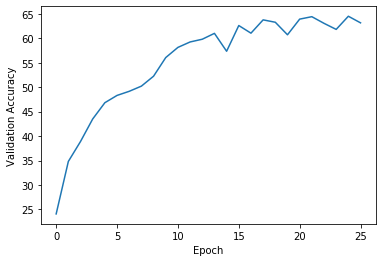


Saved model to model_26.pth. You can run `python evaluate.py --modelmodel_26.pth` to generate the Kaggle formatted csv file
Train Epoch:27 [0/50000 (0%)]	Loss: 0.978161
Train Epoch:27 [640/50000 (1%)]	Loss: 1.063018
Train Epoch:27 [1280/50000 (3%)]	Loss: 1.320226
Train Epoch:27 [1920/50000 (4%)]	Loss: 0.714550
Train Epoch:27 [2560/50000 (5%)]	Loss: 0.783882
Train Epoch:27 [3200/50000 (6%)]	Loss: 0.754701
Train Epoch:27 [3840/50000 (8%)]	Loss: 0.755580
Train Epoch:27 [4480/50000 (9%)]	Loss: 0.910066
Train Epoch:27 [5120/50000 (10%)]	Loss: 0.797069
Train Epoch:27 [5760/50000 (12%)]	Loss: 1.020650
Train Epoch:27 [6400/50000 (13%)]	Loss: 0.769759
Train Epoch:27 [7040/50000 (14%)]	Loss: 0.976312
Train Epoch:27 [7680/50000 (15%)]	Loss: 0.896634
Train Epoch:27 [8320/50000 (17%)]	Loss: 0.836860
Train Epoch:27 [8960/50000 (18%)]	Loss: 0.839933
Train Epoch:27 [9600/50000 (19%)]	Loss: 0.848636
Train Epoch:27 [10240/50000 (20%)]	Loss: 1.024721
Train Epoch:27 [10880/50000 (22%)]	Loss: 1.094744
Tra

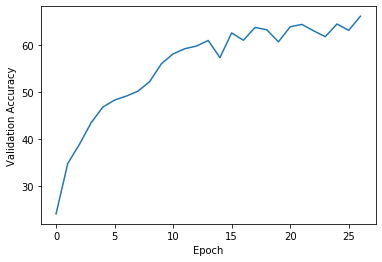


Saved model to model_27.pth. You can run `python evaluate.py --modelmodel_27.pth` to generate the Kaggle formatted csv file
Train Epoch:28 [0/50000 (0%)]	Loss: 0.802791
Train Epoch:28 [640/50000 (1%)]	Loss: 0.935382
Train Epoch:28 [1280/50000 (3%)]	Loss: 0.839894
Train Epoch:28 [1920/50000 (4%)]	Loss: 0.824471
Train Epoch:28 [2560/50000 (5%)]	Loss: 0.736284
Train Epoch:28 [3200/50000 (6%)]	Loss: 0.723069
Train Epoch:28 [3840/50000 (8%)]	Loss: 1.006201
Train Epoch:28 [4480/50000 (9%)]	Loss: 1.198306
Train Epoch:28 [5120/50000 (10%)]	Loss: 1.247692
Train Epoch:28 [5760/50000 (12%)]	Loss: 0.816173
Train Epoch:28 [6400/50000 (13%)]	Loss: 0.805680
Train Epoch:28 [7040/50000 (14%)]	Loss: 0.793971
Train Epoch:28 [7680/50000 (15%)]	Loss: 0.889243
Train Epoch:28 [8320/50000 (17%)]	Loss: 1.092698
Train Epoch:28 [8960/50000 (18%)]	Loss: 0.719412
Train Epoch:28 [9600/50000 (19%)]	Loss: 0.936473
Train Epoch:28 [10240/50000 (20%)]	Loss: 0.691443
Train Epoch:28 [10880/50000 (22%)]	Loss: 1.006361
Tra

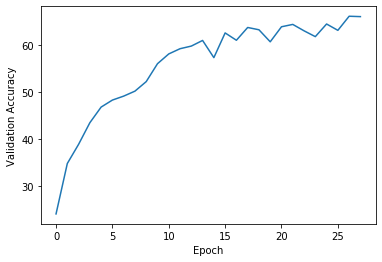


Saved model to model_28.pth. You can run `python evaluate.py --modelmodel_28.pth` to generate the Kaggle formatted csv file
Train Epoch:29 [0/50000 (0%)]	Loss: 0.716309
Train Epoch:29 [640/50000 (1%)]	Loss: 0.993716
Train Epoch:29 [1280/50000 (3%)]	Loss: 0.971986
Train Epoch:29 [1920/50000 (4%)]	Loss: 0.921644
Train Epoch:29 [2560/50000 (5%)]	Loss: 0.928391
Train Epoch:29 [3200/50000 (6%)]	Loss: 0.868143
Train Epoch:29 [3840/50000 (8%)]	Loss: 1.043384
Train Epoch:29 [4480/50000 (9%)]	Loss: 0.847589
Train Epoch:29 [5120/50000 (10%)]	Loss: 1.218774
Train Epoch:29 [5760/50000 (12%)]	Loss: 1.047701
Train Epoch:29 [6400/50000 (13%)]	Loss: 0.857911
Train Epoch:29 [7040/50000 (14%)]	Loss: 0.896580
Train Epoch:29 [7680/50000 (15%)]	Loss: 0.917161
Train Epoch:29 [8320/50000 (17%)]	Loss: 0.817028
Train Epoch:29 [8960/50000 (18%)]	Loss: 0.869264
Train Epoch:29 [9600/50000 (19%)]	Loss: 0.786383
Train Epoch:29 [10240/50000 (20%)]	Loss: 0.969544
Train Epoch:29 [10880/50000 (22%)]	Loss: 0.683974
Tra

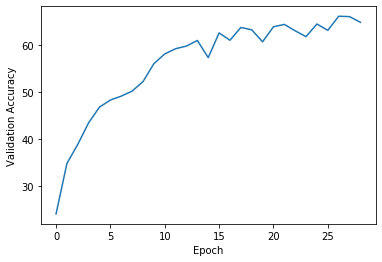


Saved model to model_29.pth. You can run `python evaluate.py --modelmodel_29.pth` to generate the Kaggle formatted csv file
Train Epoch:30 [0/50000 (0%)]	Loss: 0.762076
Train Epoch:30 [640/50000 (1%)]	Loss: 1.074914
Train Epoch:30 [1280/50000 (3%)]	Loss: 0.953765
Train Epoch:30 [1920/50000 (4%)]	Loss: 0.956122
Train Epoch:30 [2560/50000 (5%)]	Loss: 1.127062
Train Epoch:30 [3200/50000 (6%)]	Loss: 0.816438
Train Epoch:30 [3840/50000 (8%)]	Loss: 0.803656
Train Epoch:30 [4480/50000 (9%)]	Loss: 0.859303
Train Epoch:30 [5120/50000 (10%)]	Loss: 0.868279
Train Epoch:30 [5760/50000 (12%)]	Loss: 0.645739
Train Epoch:30 [6400/50000 (13%)]	Loss: 1.090369
Train Epoch:30 [7040/50000 (14%)]	Loss: 1.191020
Train Epoch:30 [7680/50000 (15%)]	Loss: 0.844259
Train Epoch:30 [8320/50000 (17%)]	Loss: 0.916938
Train Epoch:30 [8960/50000 (18%)]	Loss: 0.736013
Train Epoch:30 [9600/50000 (19%)]	Loss: 0.772596
Train Epoch:30 [10240/50000 (20%)]	Loss: 1.274533
Train Epoch:30 [10880/50000 (22%)]	Loss: 0.844369
Tra

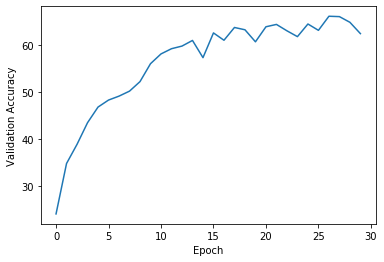


Saved model to model_30.pth. You can run `python evaluate.py --modelmodel_30.pth` to generate the Kaggle formatted csv file
Train Epoch:31 [0/50000 (0%)]	Loss: 0.914928
Train Epoch:31 [640/50000 (1%)]	Loss: 0.968920
Train Epoch:31 [1280/50000 (3%)]	Loss: 1.023858
Train Epoch:31 [1920/50000 (4%)]	Loss: 1.051792
Train Epoch:31 [2560/50000 (5%)]	Loss: 0.916528
Train Epoch:31 [3200/50000 (6%)]	Loss: 0.938404
Train Epoch:31 [3840/50000 (8%)]	Loss: 0.919981
Train Epoch:31 [4480/50000 (9%)]	Loss: 0.782819
Train Epoch:31 [5120/50000 (10%)]	Loss: 0.987629
Train Epoch:31 [5760/50000 (12%)]	Loss: 0.985542
Train Epoch:31 [6400/50000 (13%)]	Loss: 0.748467
Train Epoch:31 [7040/50000 (14%)]	Loss: 1.044350
Train Epoch:31 [7680/50000 (15%)]	Loss: 1.082287
Train Epoch:31 [8320/50000 (17%)]	Loss: 0.756271
Train Epoch:31 [8960/50000 (18%)]	Loss: 1.133187
Train Epoch:31 [9600/50000 (19%)]	Loss: 1.015186
Train Epoch:31 [10240/50000 (20%)]	Loss: 0.612915
Train Epoch:31 [10880/50000 (22%)]	Loss: 0.698574
Tra

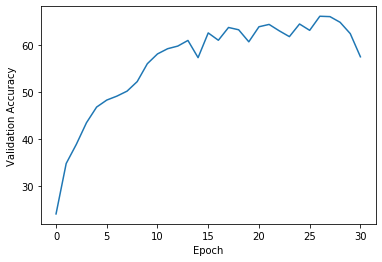


Saved model to model_31.pth. You can run `python evaluate.py --modelmodel_31.pth` to generate the Kaggle formatted csv file
Train Epoch:32 [0/50000 (0%)]	Loss: 1.039098
Train Epoch:32 [640/50000 (1%)]	Loss: 1.075816
Train Epoch:32 [1280/50000 (3%)]	Loss: 0.938700
Train Epoch:32 [1920/50000 (4%)]	Loss: 0.914504
Train Epoch:32 [2560/50000 (5%)]	Loss: 0.698834
Train Epoch:32 [3200/50000 (6%)]	Loss: 0.885537
Train Epoch:32 [3840/50000 (8%)]	Loss: 1.132595
Train Epoch:32 [4480/50000 (9%)]	Loss: 0.849026
Train Epoch:32 [5120/50000 (10%)]	Loss: 0.845696
Train Epoch:32 [5760/50000 (12%)]	Loss: 0.946813
Train Epoch:32 [6400/50000 (13%)]	Loss: 1.084952
Train Epoch:32 [7040/50000 (14%)]	Loss: 0.814228
Train Epoch:32 [7680/50000 (15%)]	Loss: 0.902780
Train Epoch:32 [8320/50000 (17%)]	Loss: 0.759068
Train Epoch:32 [8960/50000 (18%)]	Loss: 0.845479
Train Epoch:32 [9600/50000 (19%)]	Loss: 0.847759
Train Epoch:32 [10240/50000 (20%)]	Loss: 0.858510
Train Epoch:32 [10880/50000 (22%)]	Loss: 0.818323
Tra

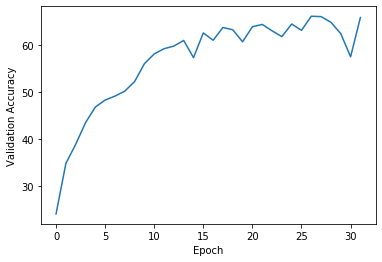


Saved model to model_32.pth. You can run `python evaluate.py --modelmodel_32.pth` to generate the Kaggle formatted csv file
Train Epoch:33 [0/50000 (0%)]	Loss: 0.827654
Train Epoch:33 [640/50000 (1%)]	Loss: 0.784140
Train Epoch:33 [1280/50000 (3%)]	Loss: 0.817400
Train Epoch:33 [1920/50000 (4%)]	Loss: 0.880649
Train Epoch:33 [2560/50000 (5%)]	Loss: 0.932409
Train Epoch:33 [3200/50000 (6%)]	Loss: 0.966717
Train Epoch:33 [3840/50000 (8%)]	Loss: 0.695155
Train Epoch:33 [4480/50000 (9%)]	Loss: 0.932336
Train Epoch:33 [5120/50000 (10%)]	Loss: 0.724844
Train Epoch:33 [5760/50000 (12%)]	Loss: 0.807433
Train Epoch:33 [6400/50000 (13%)]	Loss: 0.906152
Train Epoch:33 [7040/50000 (14%)]	Loss: 0.919251
Train Epoch:33 [7680/50000 (15%)]	Loss: 0.844079
Train Epoch:33 [8320/50000 (17%)]	Loss: 0.895937
Train Epoch:33 [8960/50000 (18%)]	Loss: 0.760649
Train Epoch:33 [9600/50000 (19%)]	Loss: 0.933331
Train Epoch:33 [10240/50000 (20%)]	Loss: 0.936272
Train Epoch:33 [10880/50000 (22%)]	Loss: 0.759848
Tra

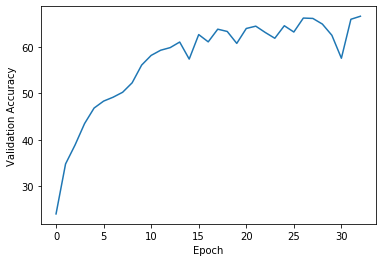


Saved model to model_33.pth. You can run `python evaluate.py --modelmodel_33.pth` to generate the Kaggle formatted csv file
Train Epoch:34 [0/50000 (0%)]	Loss: 0.715317
Train Epoch:34 [640/50000 (1%)]	Loss: 0.956419
Train Epoch:34 [1280/50000 (3%)]	Loss: 0.961812
Train Epoch:34 [1920/50000 (4%)]	Loss: 0.884337
Train Epoch:34 [2560/50000 (5%)]	Loss: 0.597626
Train Epoch:34 [3200/50000 (6%)]	Loss: 0.746560
Train Epoch:34 [3840/50000 (8%)]	Loss: 0.734960
Train Epoch:34 [4480/50000 (9%)]	Loss: 0.757910
Train Epoch:34 [5120/50000 (10%)]	Loss: 0.979149
Train Epoch:34 [5760/50000 (12%)]	Loss: 1.100813
Train Epoch:34 [6400/50000 (13%)]	Loss: 0.633729
Train Epoch:34 [7040/50000 (14%)]	Loss: 0.872883
Train Epoch:34 [7680/50000 (15%)]	Loss: 1.011688
Train Epoch:34 [8320/50000 (17%)]	Loss: 0.880366
Train Epoch:34 [8960/50000 (18%)]	Loss: 0.669174
Train Epoch:34 [9600/50000 (19%)]	Loss: 0.961464
Train Epoch:34 [10240/50000 (20%)]	Loss: 0.850521
Train Epoch:34 [10880/50000 (22%)]	Loss: 0.868644
Tra

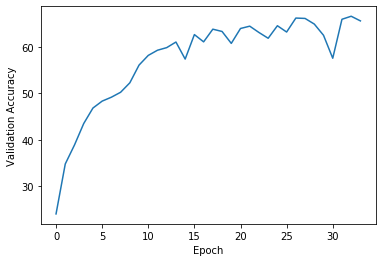


Saved model to model_34.pth. You can run `python evaluate.py --modelmodel_34.pth` to generate the Kaggle formatted csv file
Train Epoch:35 [0/50000 (0%)]	Loss: 0.785661
Train Epoch:35 [640/50000 (1%)]	Loss: 1.051142
Train Epoch:35 [1280/50000 (3%)]	Loss: 0.861562
Train Epoch:35 [1920/50000 (4%)]	Loss: 0.671548
Train Epoch:35 [2560/50000 (5%)]	Loss: 1.043803
Train Epoch:35 [3200/50000 (6%)]	Loss: 0.814000
Train Epoch:35 [3840/50000 (8%)]	Loss: 0.708979
Train Epoch:35 [4480/50000 (9%)]	Loss: 0.935764
Train Epoch:35 [5120/50000 (10%)]	Loss: 0.810978
Train Epoch:35 [5760/50000 (12%)]	Loss: 0.818978
Train Epoch:35 [6400/50000 (13%)]	Loss: 0.863471
Train Epoch:35 [7040/50000 (14%)]	Loss: 0.872990
Train Epoch:35 [7680/50000 (15%)]	Loss: 0.903608
Train Epoch:35 [8320/50000 (17%)]	Loss: 0.856644
Train Epoch:35 [8960/50000 (18%)]	Loss: 0.826377
Train Epoch:35 [9600/50000 (19%)]	Loss: 0.936152
Train Epoch:35 [10240/50000 (20%)]	Loss: 0.759147
Train Epoch:35 [10880/50000 (22%)]	Loss: 0.593452
Tra

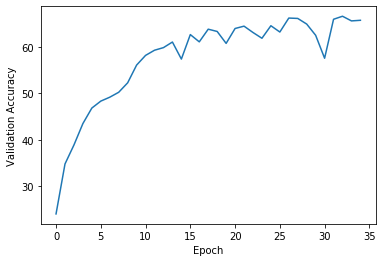


Saved model to model_35.pth. You can run `python evaluate.py --modelmodel_35.pth` to generate the Kaggle formatted csv file
Train Epoch:36 [0/50000 (0%)]	Loss: 0.644196
Train Epoch:36 [640/50000 (1%)]	Loss: 0.995014
Train Epoch:36 [1280/50000 (3%)]	Loss: 0.813236
Train Epoch:36 [1920/50000 (4%)]	Loss: 0.983357
Train Epoch:36 [2560/50000 (5%)]	Loss: 0.883414
Train Epoch:36 [3200/50000 (6%)]	Loss: 0.924143
Train Epoch:36 [3840/50000 (8%)]	Loss: 0.822032
Train Epoch:36 [4480/50000 (9%)]	Loss: 0.908844
Train Epoch:36 [5120/50000 (10%)]	Loss: 0.697888
Train Epoch:36 [5760/50000 (12%)]	Loss: 0.846286
Train Epoch:36 [6400/50000 (13%)]	Loss: 0.645230
Train Epoch:36 [7040/50000 (14%)]	Loss: 1.025005
Train Epoch:36 [7680/50000 (15%)]	Loss: 0.839664
Train Epoch:36 [8320/50000 (17%)]	Loss: 0.807106
Train Epoch:36 [8960/50000 (18%)]	Loss: 0.893969
Train Epoch:36 [9600/50000 (19%)]	Loss: 0.660247
Train Epoch:36 [10240/50000 (20%)]	Loss: 0.600975
Train Epoch:36 [10880/50000 (22%)]	Loss: 1.037655
Tra

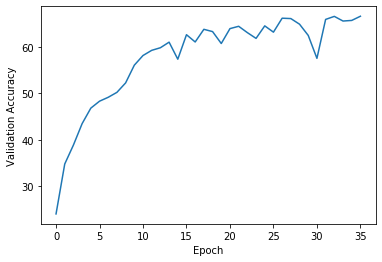


Saved model to model_36.pth. You can run `python evaluate.py --modelmodel_36.pth` to generate the Kaggle formatted csv file
Train Epoch:37 [0/50000 (0%)]	Loss: 0.852339
Train Epoch:37 [640/50000 (1%)]	Loss: 1.042565
Train Epoch:37 [1280/50000 (3%)]	Loss: 0.766372
Train Epoch:37 [1920/50000 (4%)]	Loss: 0.902219
Train Epoch:37 [2560/50000 (5%)]	Loss: 0.701024
Train Epoch:37 [3200/50000 (6%)]	Loss: 0.958226
Train Epoch:37 [3840/50000 (8%)]	Loss: 0.553557
Train Epoch:37 [4480/50000 (9%)]	Loss: 0.847535
Train Epoch:37 [5120/50000 (10%)]	Loss: 0.996969
Train Epoch:37 [5760/50000 (12%)]	Loss: 0.872425
Train Epoch:37 [6400/50000 (13%)]	Loss: 0.894985
Train Epoch:37 [7040/50000 (14%)]	Loss: 0.889699
Train Epoch:37 [7680/50000 (15%)]	Loss: 0.842132
Train Epoch:37 [8320/50000 (17%)]	Loss: 0.774650
Train Epoch:37 [8960/50000 (18%)]	Loss: 0.710591
Train Epoch:37 [9600/50000 (19%)]	Loss: 0.716875
Train Epoch:37 [10240/50000 (20%)]	Loss: 0.792759
Train Epoch:37 [10880/50000 (22%)]	Loss: 0.670114
Tra

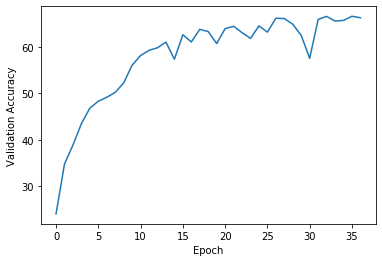


Saved model to model_37.pth. You can run `python evaluate.py --modelmodel_37.pth` to generate the Kaggle formatted csv file
Train Epoch:38 [0/50000 (0%)]	Loss: 0.851881
Train Epoch:38 [640/50000 (1%)]	Loss: 0.626647
Train Epoch:38 [1280/50000 (3%)]	Loss: 1.022108
Train Epoch:38 [1920/50000 (4%)]	Loss: 0.733495
Train Epoch:38 [2560/50000 (5%)]	Loss: 0.936665
Train Epoch:38 [3200/50000 (6%)]	Loss: 0.462104
Train Epoch:38 [3840/50000 (8%)]	Loss: 0.846948
Train Epoch:38 [4480/50000 (9%)]	Loss: 1.082077
Train Epoch:38 [5120/50000 (10%)]	Loss: 0.744711
Train Epoch:38 [5760/50000 (12%)]	Loss: 0.714668
Train Epoch:38 [6400/50000 (13%)]	Loss: 1.107552
Train Epoch:38 [7040/50000 (14%)]	Loss: 0.922999
Train Epoch:38 [7680/50000 (15%)]	Loss: 0.964333
Train Epoch:38 [8320/50000 (17%)]	Loss: 0.715111
Train Epoch:38 [8960/50000 (18%)]	Loss: 0.639733
Train Epoch:38 [9600/50000 (19%)]	Loss: 0.888950
Train Epoch:38 [10240/50000 (20%)]	Loss: 0.593604
Train Epoch:38 [10880/50000 (22%)]	Loss: 0.821414
Tra

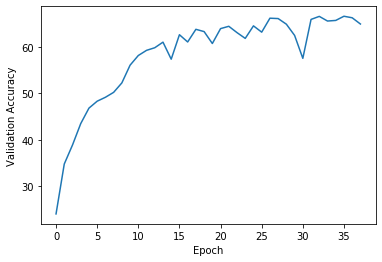


Saved model to model_38.pth. You can run `python evaluate.py --modelmodel_38.pth` to generate the Kaggle formatted csv file
Train Epoch:39 [0/50000 (0%)]	Loss: 0.830531
Train Epoch:39 [640/50000 (1%)]	Loss: 0.768550
Train Epoch:39 [1280/50000 (3%)]	Loss: 0.907096
Train Epoch:39 [1920/50000 (4%)]	Loss: 0.965198
Train Epoch:39 [2560/50000 (5%)]	Loss: 0.639326
Train Epoch:39 [3200/50000 (6%)]	Loss: 1.079314
Train Epoch:39 [3840/50000 (8%)]	Loss: 0.802055
Train Epoch:39 [4480/50000 (9%)]	Loss: 0.905185
Train Epoch:39 [5120/50000 (10%)]	Loss: 1.010124
Train Epoch:39 [5760/50000 (12%)]	Loss: 1.111374
Train Epoch:39 [6400/50000 (13%)]	Loss: 1.013072
Train Epoch:39 [7040/50000 (14%)]	Loss: 0.861158
Train Epoch:39 [7680/50000 (15%)]	Loss: 0.623547
Train Epoch:39 [8320/50000 (17%)]	Loss: 0.689394
Train Epoch:39 [8960/50000 (18%)]	Loss: 1.005377
Train Epoch:39 [9600/50000 (19%)]	Loss: 0.729468
Train Epoch:39 [10240/50000 (20%)]	Loss: 0.761656
Train Epoch:39 [10880/50000 (22%)]	Loss: 0.920206
Tra

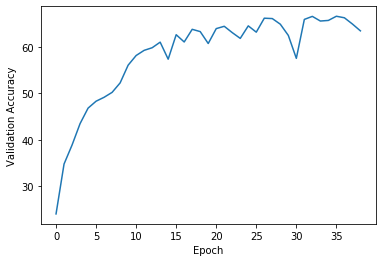


Saved model to model_39.pth. You can run `python evaluate.py --modelmodel_39.pth` to generate the Kaggle formatted csv file
Train Epoch:40 [0/50000 (0%)]	Loss: 1.058210
Train Epoch:40 [640/50000 (1%)]	Loss: 0.850417
Train Epoch:40 [1280/50000 (3%)]	Loss: 0.714505
Train Epoch:40 [1920/50000 (4%)]	Loss: 0.777222
Train Epoch:40 [2560/50000 (5%)]	Loss: 0.598443
Train Epoch:40 [3200/50000 (6%)]	Loss: 1.014767
Train Epoch:40 [3840/50000 (8%)]	Loss: 0.665487
Train Epoch:40 [4480/50000 (9%)]	Loss: 0.879417
Train Epoch:40 [5120/50000 (10%)]	Loss: 0.862257
Train Epoch:40 [5760/50000 (12%)]	Loss: 1.038424
Train Epoch:40 [6400/50000 (13%)]	Loss: 0.711497
Train Epoch:40 [7040/50000 (14%)]	Loss: 0.910769
Train Epoch:40 [7680/50000 (15%)]	Loss: 0.782285
Train Epoch:40 [8320/50000 (17%)]	Loss: 0.708151
Train Epoch:40 [8960/50000 (18%)]	Loss: 0.865626
Train Epoch:40 [9600/50000 (19%)]	Loss: 0.975673
Train Epoch:40 [10240/50000 (20%)]	Loss: 0.695592
Train Epoch:40 [10880/50000 (22%)]	Loss: 0.802873
Tra

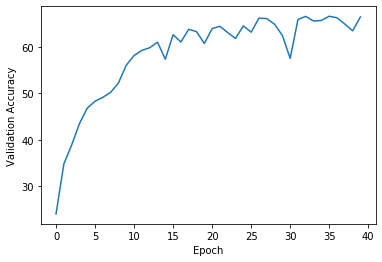


Saved model to model_40.pth. You can run `python evaluate.py --modelmodel_40.pth` to generate the Kaggle formatted csv file
Train Epoch:41 [0/50000 (0%)]	Loss: 0.674375
Train Epoch:41 [640/50000 (1%)]	Loss: 0.993006
Train Epoch:41 [1280/50000 (3%)]	Loss: 0.545253
Train Epoch:41 [1920/50000 (4%)]	Loss: 0.732744
Train Epoch:41 [2560/50000 (5%)]	Loss: 0.930155
Train Epoch:41 [3200/50000 (6%)]	Loss: 0.937838
Train Epoch:41 [3840/50000 (8%)]	Loss: 0.756222
Train Epoch:41 [4480/50000 (9%)]	Loss: 0.899741
Train Epoch:41 [5120/50000 (10%)]	Loss: 0.633708
Train Epoch:41 [5760/50000 (12%)]	Loss: 0.767974
Train Epoch:41 [6400/50000 (13%)]	Loss: 0.881092
Train Epoch:41 [7040/50000 (14%)]	Loss: 0.617866
Train Epoch:41 [7680/50000 (15%)]	Loss: 1.183358
Train Epoch:41 [8320/50000 (17%)]	Loss: 0.982087
Train Epoch:41 [8960/50000 (18%)]	Loss: 0.994238
Train Epoch:41 [9600/50000 (19%)]	Loss: 0.917071
Train Epoch:41 [10240/50000 (20%)]	Loss: 0.554915
Train Epoch:41 [10880/50000 (22%)]	Loss: 0.698710
Tra

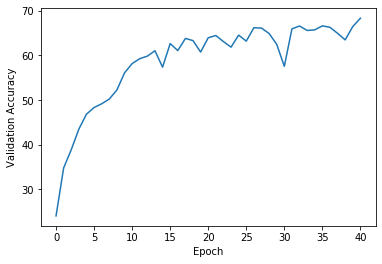


Saved model to model_41.pth. You can run `python evaluate.py --modelmodel_41.pth` to generate the Kaggle formatted csv file
Train Epoch:42 [0/50000 (0%)]	Loss: 0.995227
Train Epoch:42 [640/50000 (1%)]	Loss: 0.796606
Train Epoch:42 [1280/50000 (3%)]	Loss: 0.632938
Train Epoch:42 [1920/50000 (4%)]	Loss: 0.799327
Train Epoch:42 [2560/50000 (5%)]	Loss: 0.901627
Train Epoch:42 [3200/50000 (6%)]	Loss: 0.924279
Train Epoch:42 [3840/50000 (8%)]	Loss: 0.798403
Train Epoch:42 [4480/50000 (9%)]	Loss: 0.759365
Train Epoch:42 [5120/50000 (10%)]	Loss: 1.007461
Train Epoch:42 [5760/50000 (12%)]	Loss: 0.812143
Train Epoch:42 [6400/50000 (13%)]	Loss: 0.721920
Train Epoch:42 [7040/50000 (14%)]	Loss: 1.137515
Train Epoch:42 [7680/50000 (15%)]	Loss: 0.806249
Train Epoch:42 [8320/50000 (17%)]	Loss: 0.624413
Train Epoch:42 [8960/50000 (18%)]	Loss: 0.775791
Train Epoch:42 [9600/50000 (19%)]	Loss: 0.915757
Train Epoch:42 [10240/50000 (20%)]	Loss: 0.655208
Train Epoch:42 [10880/50000 (22%)]	Loss: 0.705311
Tra

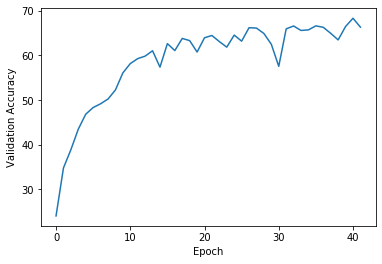


Saved model to model_42.pth. You can run `python evaluate.py --modelmodel_42.pth` to generate the Kaggle formatted csv file
Train Epoch:43 [0/50000 (0%)]	Loss: 0.601548
Train Epoch:43 [640/50000 (1%)]	Loss: 0.799534
Train Epoch:43 [1280/50000 (3%)]	Loss: 0.780754
Train Epoch:43 [1920/50000 (4%)]	Loss: 0.821657
Train Epoch:43 [2560/50000 (5%)]	Loss: 0.646838
Train Epoch:43 [3200/50000 (6%)]	Loss: 0.728929
Train Epoch:43 [3840/50000 (8%)]	Loss: 0.902377
Train Epoch:43 [4480/50000 (9%)]	Loss: 0.758120
Train Epoch:43 [5120/50000 (10%)]	Loss: 0.833693
Train Epoch:43 [5760/50000 (12%)]	Loss: 0.788853
Train Epoch:43 [6400/50000 (13%)]	Loss: 0.799648
Train Epoch:43 [7040/50000 (14%)]	Loss: 0.657313
Train Epoch:43 [7680/50000 (15%)]	Loss: 0.693707
Train Epoch:43 [8320/50000 (17%)]	Loss: 0.920496
Train Epoch:43 [8960/50000 (18%)]	Loss: 1.026026
Train Epoch:43 [9600/50000 (19%)]	Loss: 0.547379
Train Epoch:43 [10240/50000 (20%)]	Loss: 0.760203
Train Epoch:43 [10880/50000 (22%)]	Loss: 0.680590
Tra

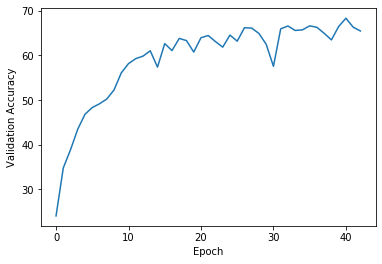


Saved model to model_43.pth. You can run `python evaluate.py --modelmodel_43.pth` to generate the Kaggle formatted csv file
Train Epoch:44 [0/50000 (0%)]	Loss: 0.804906
Train Epoch:44 [640/50000 (1%)]	Loss: 0.865509
Train Epoch:44 [1280/50000 (3%)]	Loss: 0.618909
Train Epoch:44 [1920/50000 (4%)]	Loss: 0.716840
Train Epoch:44 [2560/50000 (5%)]	Loss: 0.646985
Train Epoch:44 [3200/50000 (6%)]	Loss: 0.736160
Train Epoch:44 [3840/50000 (8%)]	Loss: 0.867091
Train Epoch:44 [4480/50000 (9%)]	Loss: 0.877327
Train Epoch:44 [5120/50000 (10%)]	Loss: 0.665990
Train Epoch:44 [5760/50000 (12%)]	Loss: 0.678600
Train Epoch:44 [6400/50000 (13%)]	Loss: 0.795705
Train Epoch:44 [7040/50000 (14%)]	Loss: 0.531259
Train Epoch:44 [7680/50000 (15%)]	Loss: 1.074588
Train Epoch:44 [8320/50000 (17%)]	Loss: 0.777349
Train Epoch:44 [8960/50000 (18%)]	Loss: 0.746636
Train Epoch:44 [9600/50000 (19%)]	Loss: 0.921591
Train Epoch:44 [10240/50000 (20%)]	Loss: 0.889015
Train Epoch:44 [10880/50000 (22%)]	Loss: 0.716611
Tra

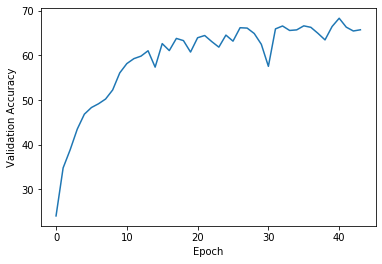


Saved model to model_44.pth. You can run `python evaluate.py --modelmodel_44.pth` to generate the Kaggle formatted csv file
Train Epoch:45 [0/50000 (0%)]	Loss: 0.717764
Train Epoch:45 [640/50000 (1%)]	Loss: 0.828792
Train Epoch:45 [1280/50000 (3%)]	Loss: 0.952977
Train Epoch:45 [1920/50000 (4%)]	Loss: 0.707887
Train Epoch:45 [2560/50000 (5%)]	Loss: 0.917822
Train Epoch:45 [3200/50000 (6%)]	Loss: 0.786942
Train Epoch:45 [3840/50000 (8%)]	Loss: 0.866097
Train Epoch:45 [4480/50000 (9%)]	Loss: 0.747887
Train Epoch:45 [5120/50000 (10%)]	Loss: 0.802422
Train Epoch:45 [5760/50000 (12%)]	Loss: 1.044519
Train Epoch:45 [6400/50000 (13%)]	Loss: 0.854839
Train Epoch:45 [7040/50000 (14%)]	Loss: 0.923200
Train Epoch:45 [7680/50000 (15%)]	Loss: 0.545043
Train Epoch:45 [8320/50000 (17%)]	Loss: 0.869480
Train Epoch:45 [8960/50000 (18%)]	Loss: 0.631728
Train Epoch:45 [9600/50000 (19%)]	Loss: 0.673049
Train Epoch:45 [10240/50000 (20%)]	Loss: 0.833660
Train Epoch:45 [10880/50000 (22%)]	Loss: 0.574500
Tra

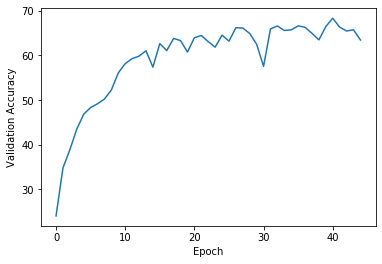


Saved model to model_45.pth. You can run `python evaluate.py --modelmodel_45.pth` to generate the Kaggle formatted csv file
Train Epoch:46 [0/50000 (0%)]	Loss: 1.013382
Train Epoch:46 [640/50000 (1%)]	Loss: 0.781881
Train Epoch:46 [1280/50000 (3%)]	Loss: 0.867551
Train Epoch:46 [1920/50000 (4%)]	Loss: 0.895769
Train Epoch:46 [2560/50000 (5%)]	Loss: 0.851230
Train Epoch:46 [3200/50000 (6%)]	Loss: 0.761788
Train Epoch:46 [3840/50000 (8%)]	Loss: 0.931157
Train Epoch:46 [4480/50000 (9%)]	Loss: 1.074018
Train Epoch:46 [5120/50000 (10%)]	Loss: 0.867348
Train Epoch:46 [5760/50000 (12%)]	Loss: 0.652471
Train Epoch:46 [6400/50000 (13%)]	Loss: 0.876818
Train Epoch:46 [7040/50000 (14%)]	Loss: 1.051370
Train Epoch:46 [7680/50000 (15%)]	Loss: 0.658556
Train Epoch:46 [8320/50000 (17%)]	Loss: 0.824861
Train Epoch:46 [8960/50000 (18%)]	Loss: 0.876999
Train Epoch:46 [9600/50000 (19%)]	Loss: 0.734983
Train Epoch:46 [10240/50000 (20%)]	Loss: 0.824309
Train Epoch:46 [10880/50000 (22%)]	Loss: 0.760564
Tra

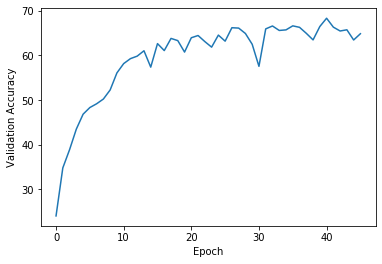


Saved model to model_46.pth. You can run `python evaluate.py --modelmodel_46.pth` to generate the Kaggle formatted csv file
Train Epoch:47 [0/50000 (0%)]	Loss: 0.876919
Train Epoch:47 [640/50000 (1%)]	Loss: 0.869338
Train Epoch:47 [1280/50000 (3%)]	Loss: 0.725131
Train Epoch:47 [1920/50000 (4%)]	Loss: 0.823227
Train Epoch:47 [2560/50000 (5%)]	Loss: 0.870931
Train Epoch:47 [3200/50000 (6%)]	Loss: 1.075857
Train Epoch:47 [3840/50000 (8%)]	Loss: 0.548785
Train Epoch:47 [4480/50000 (9%)]	Loss: 0.543975
Train Epoch:47 [5120/50000 (10%)]	Loss: 0.551236
Train Epoch:47 [5760/50000 (12%)]	Loss: 0.897988
Train Epoch:47 [6400/50000 (13%)]	Loss: 0.967561
Train Epoch:47 [7040/50000 (14%)]	Loss: 0.658010
Train Epoch:47 [7680/50000 (15%)]	Loss: 0.458799
Train Epoch:47 [8320/50000 (17%)]	Loss: 0.761708
Train Epoch:47 [8960/50000 (18%)]	Loss: 0.846309
Train Epoch:47 [9600/50000 (19%)]	Loss: 0.786807
Train Epoch:47 [10240/50000 (20%)]	Loss: 0.806858
Train Epoch:47 [10880/50000 (22%)]	Loss: 0.556183
Tra

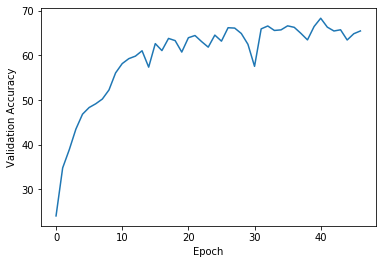


Saved model to model_47.pth. You can run `python evaluate.py --modelmodel_47.pth` to generate the Kaggle formatted csv file
Train Epoch:48 [0/50000 (0%)]	Loss: 0.636636
Train Epoch:48 [640/50000 (1%)]	Loss: 0.782053
Train Epoch:48 [1280/50000 (3%)]	Loss: 0.952776
Train Epoch:48 [1920/50000 (4%)]	Loss: 0.659696
Train Epoch:48 [2560/50000 (5%)]	Loss: 0.830981
Train Epoch:48 [3200/50000 (6%)]	Loss: 0.744327
Train Epoch:48 [3840/50000 (8%)]	Loss: 0.672648
Train Epoch:48 [4480/50000 (9%)]	Loss: 0.740656
Train Epoch:48 [5120/50000 (10%)]	Loss: 0.567600
Train Epoch:48 [5760/50000 (12%)]	Loss: 0.795390
Train Epoch:48 [6400/50000 (13%)]	Loss: 0.760025
Train Epoch:48 [7040/50000 (14%)]	Loss: 0.775045
Train Epoch:48 [7680/50000 (15%)]	Loss: 0.741845
Train Epoch:48 [8320/50000 (17%)]	Loss: 0.989347
Train Epoch:48 [8960/50000 (18%)]	Loss: 0.573571
Train Epoch:48 [9600/50000 (19%)]	Loss: 0.828729
Train Epoch:48 [10240/50000 (20%)]	Loss: 0.690620
Train Epoch:48 [10880/50000 (22%)]	Loss: 0.634564
Tra

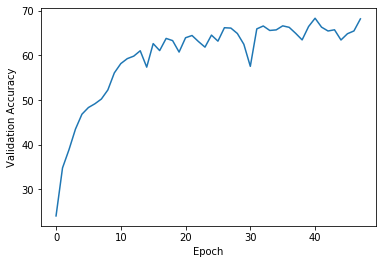


Saved model to model_48.pth. You can run `python evaluate.py --modelmodel_48.pth` to generate the Kaggle formatted csv file
Train Epoch:49 [0/50000 (0%)]	Loss: 0.777629
Train Epoch:49 [640/50000 (1%)]	Loss: 1.022136
Train Epoch:49 [1280/50000 (3%)]	Loss: 0.867444
Train Epoch:49 [1920/50000 (4%)]	Loss: 0.629740
Train Epoch:49 [2560/50000 (5%)]	Loss: 0.842782
Train Epoch:49 [3200/50000 (6%)]	Loss: 0.627346
Train Epoch:49 [3840/50000 (8%)]	Loss: 1.108754
Train Epoch:49 [4480/50000 (9%)]	Loss: 0.623813
Train Epoch:49 [5120/50000 (10%)]	Loss: 0.989997
Train Epoch:49 [5760/50000 (12%)]	Loss: 0.785016
Train Epoch:49 [6400/50000 (13%)]	Loss: 0.981317
Train Epoch:49 [7040/50000 (14%)]	Loss: 0.989513
Train Epoch:49 [7680/50000 (15%)]	Loss: 0.967358
Train Epoch:49 [8320/50000 (17%)]	Loss: 0.744705
Train Epoch:49 [8960/50000 (18%)]	Loss: 0.901779
Train Epoch:49 [9600/50000 (19%)]	Loss: 0.615740
Train Epoch:49 [10240/50000 (20%)]	Loss: 0.783237
Train Epoch:49 [10880/50000 (22%)]	Loss: 0.621985
Tra

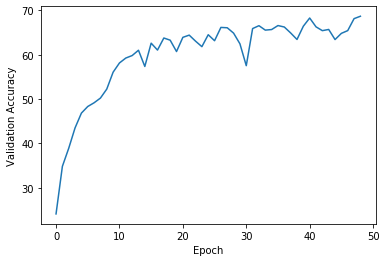


Saved model to model_49.pth. You can run `python evaluate.py --modelmodel_49.pth` to generate the Kaggle formatted csv file
Train Epoch:50 [0/50000 (0%)]	Loss: 0.742446
Train Epoch:50 [640/50000 (1%)]	Loss: 0.910656
Train Epoch:50 [1280/50000 (3%)]	Loss: 0.857568
Train Epoch:50 [1920/50000 (4%)]	Loss: 0.665220
Train Epoch:50 [2560/50000 (5%)]	Loss: 0.707207
Train Epoch:50 [3200/50000 (6%)]	Loss: 0.666178
Train Epoch:50 [3840/50000 (8%)]	Loss: 0.774261
Train Epoch:50 [4480/50000 (9%)]	Loss: 0.767210
Train Epoch:50 [5120/50000 (10%)]	Loss: 0.685178
Train Epoch:50 [5760/50000 (12%)]	Loss: 0.889462
Train Epoch:50 [6400/50000 (13%)]	Loss: 0.618661
Train Epoch:50 [7040/50000 (14%)]	Loss: 0.879291
Train Epoch:50 [7680/50000 (15%)]	Loss: 0.828012
Train Epoch:50 [8320/50000 (17%)]	Loss: 0.773884
Train Epoch:50 [8960/50000 (18%)]	Loss: 0.543555
Train Epoch:50 [9600/50000 (19%)]	Loss: 0.687707
Train Epoch:50 [10240/50000 (20%)]	Loss: 0.710587
Train Epoch:50 [10880/50000 (22%)]	Loss: 0.788073
Tra

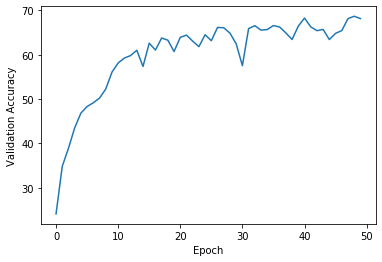


Saved model to model_50.pth. You can run `python evaluate.py --modelmodel_50.pth` to generate the Kaggle formatted csv file
Train Epoch:51 [0/50000 (0%)]	Loss: 0.829377
Train Epoch:51 [640/50000 (1%)]	Loss: 0.764293
Train Epoch:51 [1280/50000 (3%)]	Loss: 1.244884
Train Epoch:51 [1920/50000 (4%)]	Loss: 0.864783
Train Epoch:51 [2560/50000 (5%)]	Loss: 0.548208
Train Epoch:51 [3200/50000 (6%)]	Loss: 0.702670
Train Epoch:51 [3840/50000 (8%)]	Loss: 0.718494
Train Epoch:51 [4480/50000 (9%)]	Loss: 0.754176
Train Epoch:51 [5120/50000 (10%)]	Loss: 0.574201
Train Epoch:51 [5760/50000 (12%)]	Loss: 0.829053
Train Epoch:51 [6400/50000 (13%)]	Loss: 0.782896
Train Epoch:51 [7040/50000 (14%)]	Loss: 0.543604
Train Epoch:51 [7680/50000 (15%)]	Loss: 0.647701
Train Epoch:51 [8320/50000 (17%)]	Loss: 0.681605
Train Epoch:51 [8960/50000 (18%)]	Loss: 0.784125
Train Epoch:51 [9600/50000 (19%)]	Loss: 1.078094
Train Epoch:51 [10240/50000 (20%)]	Loss: 0.957478
Train Epoch:51 [10880/50000 (22%)]	Loss: 0.926615
Tra

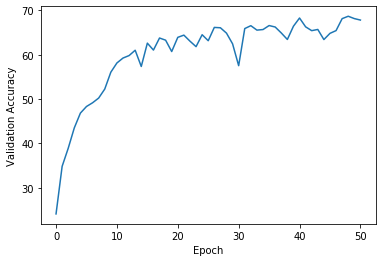


Saved model to model_51.pth. You can run `python evaluate.py --modelmodel_51.pth` to generate the Kaggle formatted csv file
Train Epoch:52 [0/50000 (0%)]	Loss: 0.646918
Train Epoch:52 [640/50000 (1%)]	Loss: 0.744272
Train Epoch:52 [1280/50000 (3%)]	Loss: 0.571963
Train Epoch:52 [1920/50000 (4%)]	Loss: 0.729804
Train Epoch:52 [2560/50000 (5%)]	Loss: 0.759956
Train Epoch:52 [3200/50000 (6%)]	Loss: 1.017310
Train Epoch:52 [3840/50000 (8%)]	Loss: 0.744142
Train Epoch:52 [4480/50000 (9%)]	Loss: 0.834176
Train Epoch:52 [5120/50000 (10%)]	Loss: 0.948062
Train Epoch:52 [5760/50000 (12%)]	Loss: 0.663215
Train Epoch:52 [6400/50000 (13%)]	Loss: 0.720092
Train Epoch:52 [7040/50000 (14%)]	Loss: 0.710797
Train Epoch:52 [7680/50000 (15%)]	Loss: 0.576838
Train Epoch:52 [8320/50000 (17%)]	Loss: 0.808835
Train Epoch:52 [8960/50000 (18%)]	Loss: 0.807669
Train Epoch:52 [9600/50000 (19%)]	Loss: 0.705145
Train Epoch:52 [10240/50000 (20%)]	Loss: 0.774345
Train Epoch:52 [10880/50000 (22%)]	Loss: 0.835100
Tra

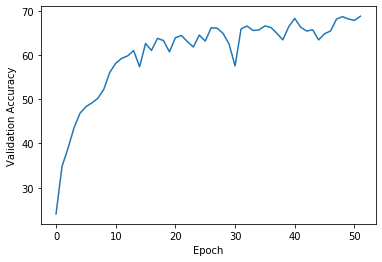


Saved model to model_52.pth. You can run `python evaluate.py --modelmodel_52.pth` to generate the Kaggle formatted csv file
Train Epoch:53 [0/50000 (0%)]	Loss: 0.771648
Train Epoch:53 [640/50000 (1%)]	Loss: 0.754814
Train Epoch:53 [1280/50000 (3%)]	Loss: 0.903465
Train Epoch:53 [1920/50000 (4%)]	Loss: 0.864195
Train Epoch:53 [2560/50000 (5%)]	Loss: 0.761088
Train Epoch:53 [3200/50000 (6%)]	Loss: 0.930248
Train Epoch:53 [3840/50000 (8%)]	Loss: 0.712693
Train Epoch:53 [4480/50000 (9%)]	Loss: 0.759561
Train Epoch:53 [5120/50000 (10%)]	Loss: 0.726083
Train Epoch:53 [5760/50000 (12%)]	Loss: 0.748542
Train Epoch:53 [6400/50000 (13%)]	Loss: 0.926061
Train Epoch:53 [7040/50000 (14%)]	Loss: 0.670927
Train Epoch:53 [7680/50000 (15%)]	Loss: 0.754760
Train Epoch:53 [8320/50000 (17%)]	Loss: 0.844055
Train Epoch:53 [8960/50000 (18%)]	Loss: 0.691158
Train Epoch:53 [9600/50000 (19%)]	Loss: 0.929146
Train Epoch:53 [10240/50000 (20%)]	Loss: 0.605319
Train Epoch:53 [10880/50000 (22%)]	Loss: 0.770862
Tra

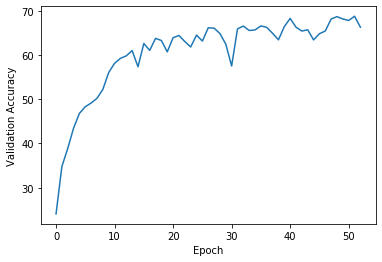


Saved model to model_53.pth. You can run `python evaluate.py --modelmodel_53.pth` to generate the Kaggle formatted csv file
Train Epoch:54 [0/50000 (0%)]	Loss: 0.785887
Train Epoch:54 [640/50000 (1%)]	Loss: 0.700973
Train Epoch:54 [1280/50000 (3%)]	Loss: 0.451109
Train Epoch:54 [1920/50000 (4%)]	Loss: 0.630763
Train Epoch:54 [2560/50000 (5%)]	Loss: 0.865667
Train Epoch:54 [3200/50000 (6%)]	Loss: 0.808855
Train Epoch:54 [3840/50000 (8%)]	Loss: 0.762615
Train Epoch:54 [4480/50000 (9%)]	Loss: 0.871980
Train Epoch:54 [5120/50000 (10%)]	Loss: 0.698698
Train Epoch:54 [5760/50000 (12%)]	Loss: 1.076195
Train Epoch:54 [6400/50000 (13%)]	Loss: 0.822869
Train Epoch:54 [7040/50000 (14%)]	Loss: 0.750400
Train Epoch:54 [7680/50000 (15%)]	Loss: 0.417374
Train Epoch:54 [8320/50000 (17%)]	Loss: 0.850260
Train Epoch:54 [8960/50000 (18%)]	Loss: 0.791960
Train Epoch:54 [9600/50000 (19%)]	Loss: 0.814007
Train Epoch:54 [10240/50000 (20%)]	Loss: 0.852739
Train Epoch:54 [10880/50000 (22%)]	Loss: 0.942354
Tra

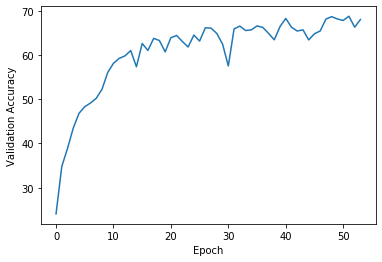


Saved model to model_54.pth. You can run `python evaluate.py --modelmodel_54.pth` to generate the Kaggle formatted csv file
Train Epoch:55 [0/50000 (0%)]	Loss: 0.788798
Train Epoch:55 [640/50000 (1%)]	Loss: 0.940028
Train Epoch:55 [1280/50000 (3%)]	Loss: 0.604795
Train Epoch:55 [1920/50000 (4%)]	Loss: 0.848492
Train Epoch:55 [2560/50000 (5%)]	Loss: 0.907951
Train Epoch:55 [3200/50000 (6%)]	Loss: 0.842576
Train Epoch:55 [3840/50000 (8%)]	Loss: 0.604754
Train Epoch:55 [4480/50000 (9%)]	Loss: 0.789893
Train Epoch:55 [5120/50000 (10%)]	Loss: 1.046810
Train Epoch:55 [5760/50000 (12%)]	Loss: 0.976600
Train Epoch:55 [6400/50000 (13%)]	Loss: 0.752803
Train Epoch:55 [7040/50000 (14%)]	Loss: 0.935741
Train Epoch:55 [7680/50000 (15%)]	Loss: 0.477338
Train Epoch:55 [8320/50000 (17%)]	Loss: 0.921810
Train Epoch:55 [8960/50000 (18%)]	Loss: 0.680883
Train Epoch:55 [9600/50000 (19%)]	Loss: 0.681317
Train Epoch:55 [10240/50000 (20%)]	Loss: 0.753981
Train Epoch:55 [10880/50000 (22%)]	Loss: 0.579950
Tra

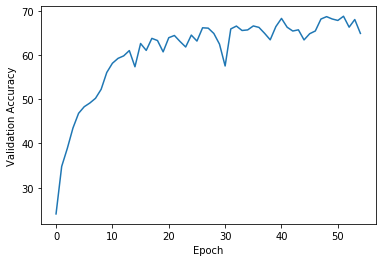


Saved model to model_55.pth. You can run `python evaluate.py --modelmodel_55.pth` to generate the Kaggle formatted csv file
Train Epoch:56 [0/50000 (0%)]	Loss: 0.650860
Train Epoch:56 [640/50000 (1%)]	Loss: 0.875813
Train Epoch:56 [1280/50000 (3%)]	Loss: 0.743573
Train Epoch:56 [1920/50000 (4%)]	Loss: 0.769631
Train Epoch:56 [2560/50000 (5%)]	Loss: 1.031540
Train Epoch:56 [3200/50000 (6%)]	Loss: 0.948653
Train Epoch:56 [3840/50000 (8%)]	Loss: 0.477349
Train Epoch:56 [4480/50000 (9%)]	Loss: 0.729644
Train Epoch:56 [5120/50000 (10%)]	Loss: 0.565174
Train Epoch:56 [5760/50000 (12%)]	Loss: 0.804207
Train Epoch:56 [6400/50000 (13%)]	Loss: 0.810861
Train Epoch:56 [7040/50000 (14%)]	Loss: 0.605462
Train Epoch:56 [7680/50000 (15%)]	Loss: 0.554851
Train Epoch:56 [8320/50000 (17%)]	Loss: 0.652355
Train Epoch:56 [8960/50000 (18%)]	Loss: 0.583285
Train Epoch:56 [9600/50000 (19%)]	Loss: 0.833825
Train Epoch:56 [10240/50000 (20%)]	Loss: 0.776958
Train Epoch:56 [10880/50000 (22%)]	Loss: 0.840209
Tra

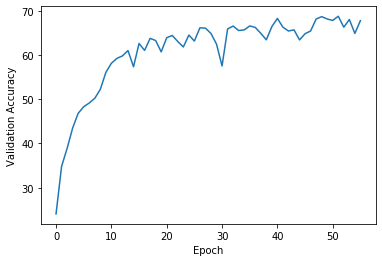


Saved model to model_56.pth. You can run `python evaluate.py --modelmodel_56.pth` to generate the Kaggle formatted csv file
Train Epoch:57 [0/50000 (0%)]	Loss: 0.724730
Train Epoch:57 [640/50000 (1%)]	Loss: 0.605024
Train Epoch:57 [1280/50000 (3%)]	Loss: 0.484819
Train Epoch:57 [1920/50000 (4%)]	Loss: 0.905117
Train Epoch:57 [2560/50000 (5%)]	Loss: 0.941721
Train Epoch:57 [3200/50000 (6%)]	Loss: 0.918166
Train Epoch:57 [3840/50000 (8%)]	Loss: 0.782513
Train Epoch:57 [4480/50000 (9%)]	Loss: 0.777134
Train Epoch:57 [5120/50000 (10%)]	Loss: 0.695747
Train Epoch:57 [5760/50000 (12%)]	Loss: 0.644714
Train Epoch:57 [6400/50000 (13%)]	Loss: 0.601394
Train Epoch:57 [7040/50000 (14%)]	Loss: 0.691150
Train Epoch:57 [7680/50000 (15%)]	Loss: 0.686699
Train Epoch:57 [8320/50000 (17%)]	Loss: 0.890508
Train Epoch:57 [8960/50000 (18%)]	Loss: 0.612905
Train Epoch:57 [9600/50000 (19%)]	Loss: 0.881621
Train Epoch:57 [10240/50000 (20%)]	Loss: 0.724975
Train Epoch:57 [10880/50000 (22%)]	Loss: 0.718491
Tra

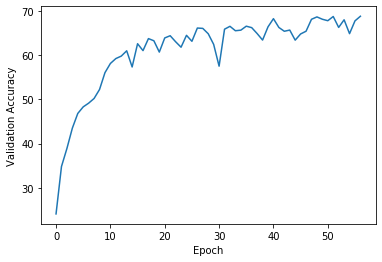


Saved model to model_57.pth. You can run `python evaluate.py --modelmodel_57.pth` to generate the Kaggle formatted csv file
Train Epoch:58 [0/50000 (0%)]	Loss: 0.572107
Train Epoch:58 [640/50000 (1%)]	Loss: 0.724897
Train Epoch:58 [1280/50000 (3%)]	Loss: 0.837006
Train Epoch:58 [1920/50000 (4%)]	Loss: 0.603884
Train Epoch:58 [2560/50000 (5%)]	Loss: 0.911749
Train Epoch:58 [3200/50000 (6%)]	Loss: 0.788169
Train Epoch:58 [3840/50000 (8%)]	Loss: 0.846131
Train Epoch:58 [4480/50000 (9%)]	Loss: 0.643344
Train Epoch:58 [5120/50000 (10%)]	Loss: 0.704578
Train Epoch:58 [5760/50000 (12%)]	Loss: 0.795068
Train Epoch:58 [6400/50000 (13%)]	Loss: 0.747571
Train Epoch:58 [7040/50000 (14%)]	Loss: 0.704123
Train Epoch:58 [7680/50000 (15%)]	Loss: 0.722776
Train Epoch:58 [8320/50000 (17%)]	Loss: 0.594912
Train Epoch:58 [8960/50000 (18%)]	Loss: 0.673549
Train Epoch:58 [9600/50000 (19%)]	Loss: 0.549920
Train Epoch:58 [10240/50000 (20%)]	Loss: 0.700108
Train Epoch:58 [10880/50000 (22%)]	Loss: 1.082174
Tra

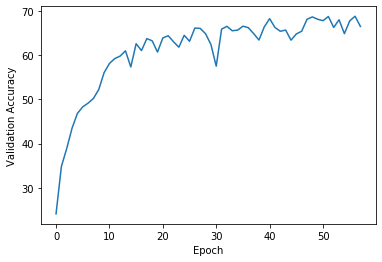


Saved model to model_58.pth. You can run `python evaluate.py --modelmodel_58.pth` to generate the Kaggle formatted csv file
Train Epoch:59 [0/50000 (0%)]	Loss: 0.716160
Train Epoch:59 [640/50000 (1%)]	Loss: 0.547660
Train Epoch:59 [1280/50000 (3%)]	Loss: 0.707151
Train Epoch:59 [1920/50000 (4%)]	Loss: 0.776911
Train Epoch:59 [2560/50000 (5%)]	Loss: 0.500413
Train Epoch:59 [3200/50000 (6%)]	Loss: 0.700813
Train Epoch:59 [3840/50000 (8%)]	Loss: 0.657058
Train Epoch:59 [4480/50000 (9%)]	Loss: 0.784563
Train Epoch:59 [5120/50000 (10%)]	Loss: 0.779096
Train Epoch:59 [5760/50000 (12%)]	Loss: 0.750661
Train Epoch:59 [6400/50000 (13%)]	Loss: 0.693856
Train Epoch:59 [7040/50000 (14%)]	Loss: 0.854185
Train Epoch:59 [7680/50000 (15%)]	Loss: 1.005000
Train Epoch:59 [8320/50000 (17%)]	Loss: 0.951802
Train Epoch:59 [8960/50000 (18%)]	Loss: 0.734302
Train Epoch:59 [9600/50000 (19%)]	Loss: 0.704239
Train Epoch:59 [10240/50000 (20%)]	Loss: 0.914903
Train Epoch:59 [10880/50000 (22%)]	Loss: 0.810493
Tra

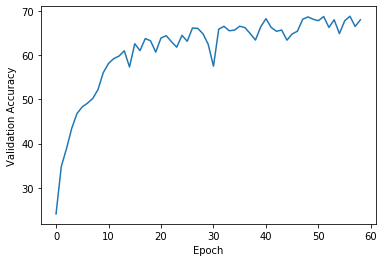


Saved model to model_59.pth. You can run `python evaluate.py --modelmodel_59.pth` to generate the Kaggle formatted csv file
Train Epoch:60 [0/50000 (0%)]	Loss: 0.697507
Train Epoch:60 [640/50000 (1%)]	Loss: 0.798562
Train Epoch:60 [1280/50000 (3%)]	Loss: 0.809914
Train Epoch:60 [1920/50000 (4%)]	Loss: 0.417956
Train Epoch:60 [2560/50000 (5%)]	Loss: 0.769319
Train Epoch:60 [3200/50000 (6%)]	Loss: 0.848973
Train Epoch:60 [3840/50000 (8%)]	Loss: 0.712946
Train Epoch:60 [4480/50000 (9%)]	Loss: 0.757713
Train Epoch:60 [5120/50000 (10%)]	Loss: 1.085153
Train Epoch:60 [5760/50000 (12%)]	Loss: 0.808076
Train Epoch:60 [6400/50000 (13%)]	Loss: 0.494169
Train Epoch:60 [7040/50000 (14%)]	Loss: 0.898838
Train Epoch:60 [7680/50000 (15%)]	Loss: 0.526081
Train Epoch:60 [8320/50000 (17%)]	Loss: 0.598537
Train Epoch:60 [8960/50000 (18%)]	Loss: 0.612252
Train Epoch:60 [9600/50000 (19%)]	Loss: 0.625837
Train Epoch:60 [10240/50000 (20%)]	Loss: 0.688413
Train Epoch:60 [10880/50000 (22%)]	Loss: 0.681176
Tra

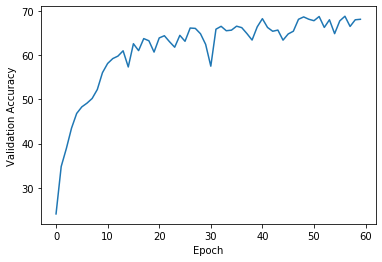


Saved model to model_60.pth. You can run `python evaluate.py --modelmodel_60.pth` to generate the Kaggle formatted csv file
Train Epoch:61 [0/50000 (0%)]	Loss: 0.778391
Train Epoch:61 [640/50000 (1%)]	Loss: 0.705902
Train Epoch:61 [1280/50000 (3%)]	Loss: 0.607415
Train Epoch:61 [1920/50000 (4%)]	Loss: 0.901377
Train Epoch:61 [2560/50000 (5%)]	Loss: 0.819680
Train Epoch:61 [3200/50000 (6%)]	Loss: 0.768424
Train Epoch:61 [3840/50000 (8%)]	Loss: 0.441851
Train Epoch:61 [4480/50000 (9%)]	Loss: 0.622011
Train Epoch:61 [5120/50000 (10%)]	Loss: 0.743277
Train Epoch:61 [5760/50000 (12%)]	Loss: 0.672857
Train Epoch:61 [6400/50000 (13%)]	Loss: 0.623807
Train Epoch:61 [7040/50000 (14%)]	Loss: 0.990564
Train Epoch:61 [7680/50000 (15%)]	Loss: 0.741936
Train Epoch:61 [8320/50000 (17%)]	Loss: 0.793251
Train Epoch:61 [8960/50000 (18%)]	Loss: 0.711974
Train Epoch:61 [9600/50000 (19%)]	Loss: 0.715036
Train Epoch:61 [10240/50000 (20%)]	Loss: 0.705129
Train Epoch:61 [10880/50000 (22%)]	Loss: 0.828519
Tra

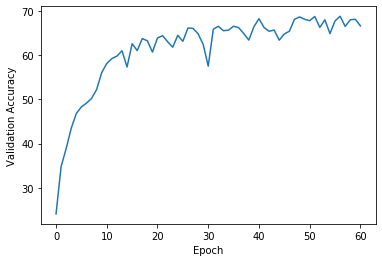


Saved model to model_61.pth. You can run `python evaluate.py --modelmodel_61.pth` to generate the Kaggle formatted csv file
Train Epoch:62 [0/50000 (0%)]	Loss: 0.983351
Train Epoch:62 [640/50000 (1%)]	Loss: 0.743060
Train Epoch:62 [1280/50000 (3%)]	Loss: 0.626209
Train Epoch:62 [1920/50000 (4%)]	Loss: 0.828623
Train Epoch:62 [2560/50000 (5%)]	Loss: 0.700318
Train Epoch:62 [3200/50000 (6%)]	Loss: 0.869838
Train Epoch:62 [3840/50000 (8%)]	Loss: 0.424817
Train Epoch:62 [4480/50000 (9%)]	Loss: 0.715604
Train Epoch:62 [5120/50000 (10%)]	Loss: 0.639027
Train Epoch:62 [5760/50000 (12%)]	Loss: 0.793835
Train Epoch:62 [6400/50000 (13%)]	Loss: 0.679822
Train Epoch:62 [7040/50000 (14%)]	Loss: 0.642271
Train Epoch:62 [7680/50000 (15%)]	Loss: 0.902726
Train Epoch:62 [8320/50000 (17%)]	Loss: 0.574630
Train Epoch:62 [8960/50000 (18%)]	Loss: 0.693655
Train Epoch:62 [9600/50000 (19%)]	Loss: 0.910141
Train Epoch:62 [10240/50000 (20%)]	Loss: 0.653027
Train Epoch:62 [10880/50000 (22%)]	Loss: 0.863011
Tra

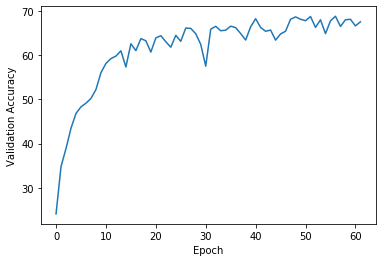


Saved model to model_62.pth. You can run `python evaluate.py --modelmodel_62.pth` to generate the Kaggle formatted csv file
Train Epoch:63 [0/50000 (0%)]	Loss: 0.756552
Train Epoch:63 [640/50000 (1%)]	Loss: 0.453662
Train Epoch:63 [1280/50000 (3%)]	Loss: 0.560867
Train Epoch:63 [1920/50000 (4%)]	Loss: 0.661078
Train Epoch:63 [2560/50000 (5%)]	Loss: 0.709218
Train Epoch:63 [3200/50000 (6%)]	Loss: 0.591907
Train Epoch:63 [3840/50000 (8%)]	Loss: 0.757474
Train Epoch:63 [4480/50000 (9%)]	Loss: 0.809834
Train Epoch:63 [5120/50000 (10%)]	Loss: 0.664056
Train Epoch:63 [5760/50000 (12%)]	Loss: 0.580573
Train Epoch:63 [6400/50000 (13%)]	Loss: 0.756201
Train Epoch:63 [7040/50000 (14%)]	Loss: 0.547017
Train Epoch:63 [7680/50000 (15%)]	Loss: 0.619917
Train Epoch:63 [8320/50000 (17%)]	Loss: 0.698926
Train Epoch:63 [8960/50000 (18%)]	Loss: 0.934275
Train Epoch:63 [9600/50000 (19%)]	Loss: 0.584120
Train Epoch:63 [10240/50000 (20%)]	Loss: 0.762387
Train Epoch:63 [10880/50000 (22%)]	Loss: 0.735101
Tra

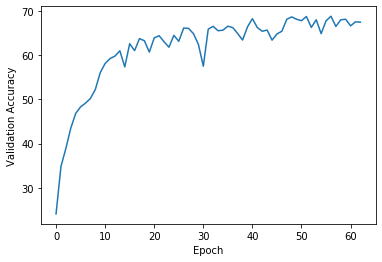


Saved model to model_63.pth. You can run `python evaluate.py --modelmodel_63.pth` to generate the Kaggle formatted csv file
Train Epoch:64 [0/50000 (0%)]	Loss: 0.464750
Train Epoch:64 [640/50000 (1%)]	Loss: 0.556642
Train Epoch:64 [1280/50000 (3%)]	Loss: 0.621664
Train Epoch:64 [1920/50000 (4%)]	Loss: 0.778708
Train Epoch:64 [2560/50000 (5%)]	Loss: 0.663738
Train Epoch:64 [3200/50000 (6%)]	Loss: 0.668092
Train Epoch:64 [3840/50000 (8%)]	Loss: 0.608606
Train Epoch:64 [4480/50000 (9%)]	Loss: 0.811180
Train Epoch:64 [5120/50000 (10%)]	Loss: 0.862273
Train Epoch:64 [5760/50000 (12%)]	Loss: 0.606724
Train Epoch:64 [6400/50000 (13%)]	Loss: 0.649212
Train Epoch:64 [7040/50000 (14%)]	Loss: 0.673979
Train Epoch:64 [7680/50000 (15%)]	Loss: 0.557546
Train Epoch:64 [8320/50000 (17%)]	Loss: 0.892068
Train Epoch:64 [8960/50000 (18%)]	Loss: 0.582492
Train Epoch:64 [9600/50000 (19%)]	Loss: 0.471421
Train Epoch:64 [10240/50000 (20%)]	Loss: 0.761175
Train Epoch:64 [10880/50000 (22%)]	Loss: 0.549563
Tra

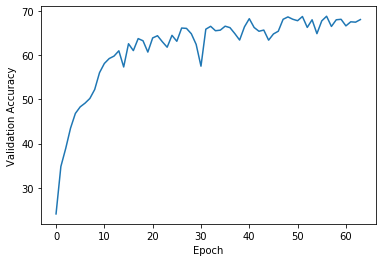


Saved model to model_64.pth. You can run `python evaluate.py --modelmodel_64.pth` to generate the Kaggle formatted csv file
Train Epoch:65 [0/50000 (0%)]	Loss: 0.732239
Train Epoch:65 [640/50000 (1%)]	Loss: 0.580545
Train Epoch:65 [1280/50000 (3%)]	Loss: 0.701263
Train Epoch:65 [1920/50000 (4%)]	Loss: 0.698576
Train Epoch:65 [2560/50000 (5%)]	Loss: 0.860053
Train Epoch:65 [3200/50000 (6%)]	Loss: 0.586268
Train Epoch:65 [3840/50000 (8%)]	Loss: 0.499807
Train Epoch:65 [4480/50000 (9%)]	Loss: 0.828206
Train Epoch:65 [5120/50000 (10%)]	Loss: 0.743071
Train Epoch:65 [5760/50000 (12%)]	Loss: 0.637749
Train Epoch:65 [6400/50000 (13%)]	Loss: 0.713091
Train Epoch:65 [7040/50000 (14%)]	Loss: 0.862336
Train Epoch:65 [7680/50000 (15%)]	Loss: 0.767770
Train Epoch:65 [8320/50000 (17%)]	Loss: 0.706910
Train Epoch:65 [8960/50000 (18%)]	Loss: 0.626701
Train Epoch:65 [9600/50000 (19%)]	Loss: 0.501769
Train Epoch:65 [10240/50000 (20%)]	Loss: 0.663789
Train Epoch:65 [10880/50000 (22%)]	Loss: 0.654526
Tra

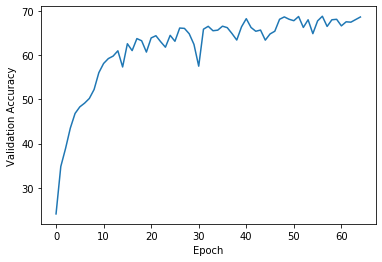


Saved model to model_65.pth. You can run `python evaluate.py --modelmodel_65.pth` to generate the Kaggle formatted csv file
Train Epoch:66 [0/50000 (0%)]	Loss: 0.798601
Train Epoch:66 [640/50000 (1%)]	Loss: 0.523586
Train Epoch:66 [1280/50000 (3%)]	Loss: 0.795843
Train Epoch:66 [1920/50000 (4%)]	Loss: 0.584090
Train Epoch:66 [2560/50000 (5%)]	Loss: 0.636735
Train Epoch:66 [3200/50000 (6%)]	Loss: 0.399244
Train Epoch:66 [3840/50000 (8%)]	Loss: 0.745262
Train Epoch:66 [4480/50000 (9%)]	Loss: 0.645918
Train Epoch:66 [5120/50000 (10%)]	Loss: 0.573203
Train Epoch:66 [5760/50000 (12%)]	Loss: 0.803250
Train Epoch:66 [6400/50000 (13%)]	Loss: 0.726601
Train Epoch:66 [7040/50000 (14%)]	Loss: 0.726850
Train Epoch:66 [7680/50000 (15%)]	Loss: 0.742340
Train Epoch:66 [8320/50000 (17%)]	Loss: 0.741253
Train Epoch:66 [8960/50000 (18%)]	Loss: 0.821107
Train Epoch:66 [9600/50000 (19%)]	Loss: 1.003061
Train Epoch:66 [10240/50000 (20%)]	Loss: 0.774969
Train Epoch:66 [10880/50000 (22%)]	Loss: 0.907814
Tra

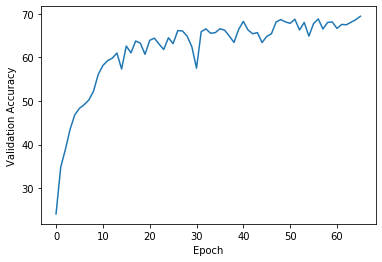


Saved model to model_66.pth. You can run `python evaluate.py --modelmodel_66.pth` to generate the Kaggle formatted csv file
Train Epoch:67 [0/50000 (0%)]	Loss: 0.944404
Train Epoch:67 [640/50000 (1%)]	Loss: 0.562762
Train Epoch:67 [1280/50000 (3%)]	Loss: 0.594404
Train Epoch:67 [1920/50000 (4%)]	Loss: 0.494024
Train Epoch:67 [2560/50000 (5%)]	Loss: 0.626089
Train Epoch:67 [3200/50000 (6%)]	Loss: 0.498534
Train Epoch:67 [3840/50000 (8%)]	Loss: 0.621899
Train Epoch:67 [4480/50000 (9%)]	Loss: 0.735209
Train Epoch:67 [5120/50000 (10%)]	Loss: 0.732363
Train Epoch:67 [5760/50000 (12%)]	Loss: 0.483579
Train Epoch:67 [6400/50000 (13%)]	Loss: 1.143002
Train Epoch:67 [7040/50000 (14%)]	Loss: 0.512429
Train Epoch:67 [7680/50000 (15%)]	Loss: 0.663785
Train Epoch:67 [8320/50000 (17%)]	Loss: 0.542180
Train Epoch:67 [8960/50000 (18%)]	Loss: 0.531177
Train Epoch:67 [9600/50000 (19%)]	Loss: 0.631168
Train Epoch:67 [10240/50000 (20%)]	Loss: 0.818683
Train Epoch:67 [10880/50000 (22%)]	Loss: 0.607214
Tra

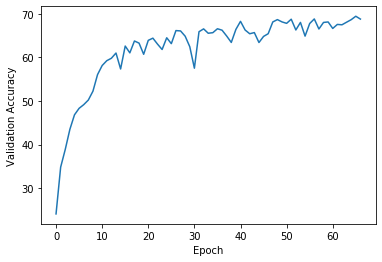


Saved model to model_67.pth. You can run `python evaluate.py --modelmodel_67.pth` to generate the Kaggle formatted csv file
Train Epoch:68 [0/50000 (0%)]	Loss: 0.450554
Train Epoch:68 [640/50000 (1%)]	Loss: 0.684300
Train Epoch:68 [1280/50000 (3%)]	Loss: 0.519141
Train Epoch:68 [1920/50000 (4%)]	Loss: 0.524020
Train Epoch:68 [2560/50000 (5%)]	Loss: 0.578022
Train Epoch:68 [3200/50000 (6%)]	Loss: 0.878357
Train Epoch:68 [3840/50000 (8%)]	Loss: 0.625193
Train Epoch:68 [4480/50000 (9%)]	Loss: 0.677152
Train Epoch:68 [5120/50000 (10%)]	Loss: 0.774356
Train Epoch:68 [5760/50000 (12%)]	Loss: 0.553446
Train Epoch:68 [6400/50000 (13%)]	Loss: 0.845425
Train Epoch:68 [7040/50000 (14%)]	Loss: 0.541909
Train Epoch:68 [7680/50000 (15%)]	Loss: 0.621161
Train Epoch:68 [8320/50000 (17%)]	Loss: 0.673977
Train Epoch:68 [8960/50000 (18%)]	Loss: 0.677602
Train Epoch:68 [9600/50000 (19%)]	Loss: 0.657517
Train Epoch:68 [10240/50000 (20%)]	Loss: 0.839477
Train Epoch:68 [10880/50000 (22%)]	Loss: 0.772861
Tra

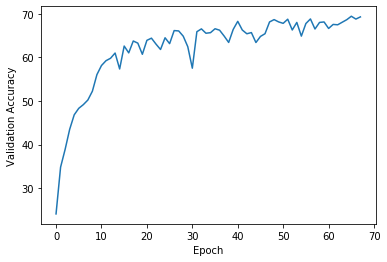


Saved model to model_68.pth. You can run `python evaluate.py --modelmodel_68.pth` to generate the Kaggle formatted csv file
Train Epoch:69 [0/50000 (0%)]	Loss: 0.760625
Train Epoch:69 [640/50000 (1%)]	Loss: 0.867940
Train Epoch:69 [1280/50000 (3%)]	Loss: 0.578590
Train Epoch:69 [1920/50000 (4%)]	Loss: 0.612707
Train Epoch:69 [2560/50000 (5%)]	Loss: 0.722488
Train Epoch:69 [3200/50000 (6%)]	Loss: 0.785313
Train Epoch:69 [3840/50000 (8%)]	Loss: 0.703950
Train Epoch:69 [4480/50000 (9%)]	Loss: 0.741024
Train Epoch:69 [5120/50000 (10%)]	Loss: 0.627607
Train Epoch:69 [5760/50000 (12%)]	Loss: 0.751284
Train Epoch:69 [6400/50000 (13%)]	Loss: 0.848359
Train Epoch:69 [7040/50000 (14%)]	Loss: 0.780442
Train Epoch:69 [7680/50000 (15%)]	Loss: 0.984505
Train Epoch:69 [8320/50000 (17%)]	Loss: 0.682044
Train Epoch:69 [8960/50000 (18%)]	Loss: 0.788038
Train Epoch:69 [9600/50000 (19%)]	Loss: 0.744503
Train Epoch:69 [10240/50000 (20%)]	Loss: 0.713904
Train Epoch:69 [10880/50000 (22%)]	Loss: 0.649795
Tra

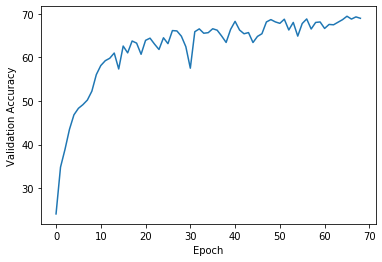


Saved model to model_69.pth. You can run `python evaluate.py --modelmodel_69.pth` to generate the Kaggle formatted csv file
Train Epoch:70 [0/50000 (0%)]	Loss: 0.735437
Train Epoch:70 [640/50000 (1%)]	Loss: 0.899556
Train Epoch:70 [1280/50000 (3%)]	Loss: 0.782009
Train Epoch:70 [1920/50000 (4%)]	Loss: 0.674537
Train Epoch:70 [2560/50000 (5%)]	Loss: 0.734162
Train Epoch:70 [3200/50000 (6%)]	Loss: 0.509598
Train Epoch:70 [3840/50000 (8%)]	Loss: 0.750361
Train Epoch:70 [4480/50000 (9%)]	Loss: 0.780776
Train Epoch:70 [5120/50000 (10%)]	Loss: 0.738377
Train Epoch:70 [5760/50000 (12%)]	Loss: 0.873891
Train Epoch:70 [6400/50000 (13%)]	Loss: 0.774917
Train Epoch:70 [7040/50000 (14%)]	Loss: 1.020139
Train Epoch:70 [7680/50000 (15%)]	Loss: 0.615846
Train Epoch:70 [8320/50000 (17%)]	Loss: 0.761884
Train Epoch:70 [8960/50000 (18%)]	Loss: 0.840076
Train Epoch:70 [9600/50000 (19%)]	Loss: 0.934062
Train Epoch:70 [10240/50000 (20%)]	Loss: 0.871567
Train Epoch:70 [10880/50000 (22%)]	Loss: 0.627557
Tra

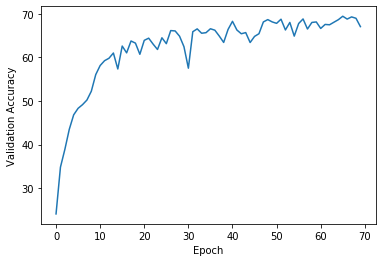


Saved model to model_70.pth. You can run `python evaluate.py --modelmodel_70.pth` to generate the Kaggle formatted csv file
Train Epoch:71 [0/50000 (0%)]	Loss: 0.666926
Train Epoch:71 [640/50000 (1%)]	Loss: 0.886904
Train Epoch:71 [1280/50000 (3%)]	Loss: 0.763193
Train Epoch:71 [1920/50000 (4%)]	Loss: 0.699636
Train Epoch:71 [2560/50000 (5%)]	Loss: 0.723140
Train Epoch:71 [3200/50000 (6%)]	Loss: 0.539588
Train Epoch:71 [3840/50000 (8%)]	Loss: 0.901352
Train Epoch:71 [4480/50000 (9%)]	Loss: 0.680286
Train Epoch:71 [5120/50000 (10%)]	Loss: 0.616444
Train Epoch:71 [5760/50000 (12%)]	Loss: 0.722731
Train Epoch:71 [6400/50000 (13%)]	Loss: 0.757636
Train Epoch:71 [7040/50000 (14%)]	Loss: 0.545571
Train Epoch:71 [7680/50000 (15%)]	Loss: 0.673850
Train Epoch:71 [8320/50000 (17%)]	Loss: 0.624782
Train Epoch:71 [8960/50000 (18%)]	Loss: 0.865260
Train Epoch:71 [9600/50000 (19%)]	Loss: 0.643285
Train Epoch:71 [10240/50000 (20%)]	Loss: 0.594728
Train Epoch:71 [10880/50000 (22%)]	Loss: 0.662269
Tra

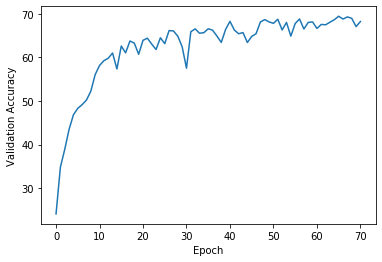


Saved model to model_71.pth. You can run `python evaluate.py --modelmodel_71.pth` to generate the Kaggle formatted csv file
Train Epoch:72 [0/50000 (0%)]	Loss: 0.570642
Train Epoch:72 [640/50000 (1%)]	Loss: 0.895479
Train Epoch:72 [1280/50000 (3%)]	Loss: 0.905769
Train Epoch:72 [1920/50000 (4%)]	Loss: 0.855600
Train Epoch:72 [2560/50000 (5%)]	Loss: 0.506975
Train Epoch:72 [3200/50000 (6%)]	Loss: 0.711178
Train Epoch:72 [3840/50000 (8%)]	Loss: 0.673662
Train Epoch:72 [4480/50000 (9%)]	Loss: 0.705976
Train Epoch:72 [5120/50000 (10%)]	Loss: 0.643758
Train Epoch:72 [5760/50000 (12%)]	Loss: 0.599592
Train Epoch:72 [6400/50000 (13%)]	Loss: 0.580114
Train Epoch:72 [7040/50000 (14%)]	Loss: 0.706026
Train Epoch:72 [7680/50000 (15%)]	Loss: 0.854997
Train Epoch:72 [8320/50000 (17%)]	Loss: 0.699874
Train Epoch:72 [8960/50000 (18%)]	Loss: 0.470487
Train Epoch:72 [9600/50000 (19%)]	Loss: 0.935430
Train Epoch:72 [10240/50000 (20%)]	Loss: 0.770370
Train Epoch:72 [10880/50000 (22%)]	Loss: 0.770105
Tra

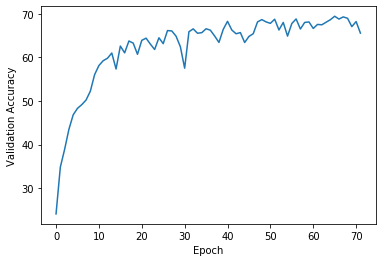


Saved model to model_72.pth. You can run `python evaluate.py --modelmodel_72.pth` to generate the Kaggle formatted csv file
Train Epoch:73 [0/50000 (0%)]	Loss: 0.744593
Train Epoch:73 [640/50000 (1%)]	Loss: 0.768093
Train Epoch:73 [1280/50000 (3%)]	Loss: 0.680219
Train Epoch:73 [1920/50000 (4%)]	Loss: 0.705407
Train Epoch:73 [2560/50000 (5%)]	Loss: 0.719058
Train Epoch:73 [3200/50000 (6%)]	Loss: 0.639550
Train Epoch:73 [3840/50000 (8%)]	Loss: 0.699071
Train Epoch:73 [4480/50000 (9%)]	Loss: 0.706917
Train Epoch:73 [5120/50000 (10%)]	Loss: 0.502681
Train Epoch:73 [5760/50000 (12%)]	Loss: 0.842414
Train Epoch:73 [6400/50000 (13%)]	Loss: 0.688347
Train Epoch:73 [7040/50000 (14%)]	Loss: 0.893200
Train Epoch:73 [7680/50000 (15%)]	Loss: 0.693265
Train Epoch:73 [8320/50000 (17%)]	Loss: 0.664203
Train Epoch:73 [8960/50000 (18%)]	Loss: 0.816788
Train Epoch:73 [9600/50000 (19%)]	Loss: 0.650495
Train Epoch:73 [10240/50000 (20%)]	Loss: 0.885197
Train Epoch:73 [10880/50000 (22%)]	Loss: 0.727911
Tra

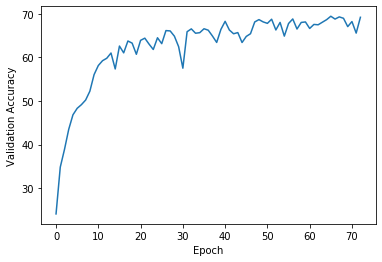


Saved model to model_73.pth. You can run `python evaluate.py --modelmodel_73.pth` to generate the Kaggle formatted csv file
Train Epoch:74 [0/50000 (0%)]	Loss: 0.610224
Train Epoch:74 [640/50000 (1%)]	Loss: 0.425563
Train Epoch:74 [1280/50000 (3%)]	Loss: 0.607475
Train Epoch:74 [1920/50000 (4%)]	Loss: 0.716126
Train Epoch:74 [2560/50000 (5%)]	Loss: 0.555514
Train Epoch:74 [3200/50000 (6%)]	Loss: 0.688051
Train Epoch:74 [3840/50000 (8%)]	Loss: 0.666249
Train Epoch:74 [4480/50000 (9%)]	Loss: 0.640097
Train Epoch:74 [5120/50000 (10%)]	Loss: 0.752264
Train Epoch:74 [5760/50000 (12%)]	Loss: 0.652017
Train Epoch:74 [6400/50000 (13%)]	Loss: 0.587364
Train Epoch:74 [7040/50000 (14%)]	Loss: 0.738548
Train Epoch:74 [7680/50000 (15%)]	Loss: 0.950974
Train Epoch:74 [8320/50000 (17%)]	Loss: 0.613127
Train Epoch:74 [8960/50000 (18%)]	Loss: 1.067400
Train Epoch:74 [9600/50000 (19%)]	Loss: 0.621773
Train Epoch:74 [10240/50000 (20%)]	Loss: 0.787872
Train Epoch:74 [10880/50000 (22%)]	Loss: 0.638079
Tra

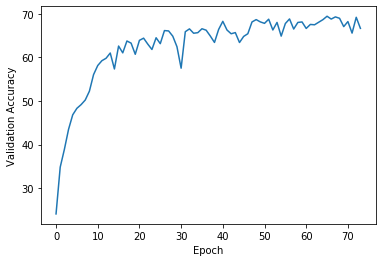


Saved model to model_74.pth. You can run `python evaluate.py --modelmodel_74.pth` to generate the Kaggle formatted csv file
Train Epoch:75 [0/50000 (0%)]	Loss: 0.874471
Train Epoch:75 [640/50000 (1%)]	Loss: 0.976471
Train Epoch:75 [1280/50000 (3%)]	Loss: 0.591541
Train Epoch:75 [1920/50000 (4%)]	Loss: 0.748905
Train Epoch:75 [2560/50000 (5%)]	Loss: 0.638307
Train Epoch:75 [3200/50000 (6%)]	Loss: 0.650598
Train Epoch:75 [3840/50000 (8%)]	Loss: 0.771135
Train Epoch:75 [4480/50000 (9%)]	Loss: 0.416866
Train Epoch:75 [5120/50000 (10%)]	Loss: 0.787838
Train Epoch:75 [5760/50000 (12%)]	Loss: 0.898924
Train Epoch:75 [6400/50000 (13%)]	Loss: 1.052817
Train Epoch:75 [7040/50000 (14%)]	Loss: 0.876197
Train Epoch:75 [7680/50000 (15%)]	Loss: 0.720146
Train Epoch:75 [8320/50000 (17%)]	Loss: 0.563873
Train Epoch:75 [8960/50000 (18%)]	Loss: 0.506782
Train Epoch:75 [9600/50000 (19%)]	Loss: 0.619765
Train Epoch:75 [10240/50000 (20%)]	Loss: 1.037171
Train Epoch:75 [10880/50000 (22%)]	Loss: 0.746980
Tra

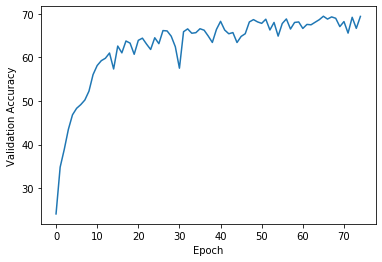


Saved model to model_75.pth. You can run `python evaluate.py --modelmodel_75.pth` to generate the Kaggle formatted csv file
Train Epoch:76 [0/50000 (0%)]	Loss: 0.549366
Train Epoch:76 [640/50000 (1%)]	Loss: 0.822099
Train Epoch:76 [1280/50000 (3%)]	Loss: 0.580889
Train Epoch:76 [1920/50000 (4%)]	Loss: 0.593242
Train Epoch:76 [2560/50000 (5%)]	Loss: 0.625957
Train Epoch:76 [3200/50000 (6%)]	Loss: 0.797467
Train Epoch:76 [3840/50000 (8%)]	Loss: 0.658360
Train Epoch:76 [4480/50000 (9%)]	Loss: 0.692605
Train Epoch:76 [5120/50000 (10%)]	Loss: 0.825496
Train Epoch:76 [5760/50000 (12%)]	Loss: 0.892046
Train Epoch:76 [6400/50000 (13%)]	Loss: 0.606150
Train Epoch:76 [7040/50000 (14%)]	Loss: 0.675987
Train Epoch:76 [7680/50000 (15%)]	Loss: 0.638256
Train Epoch:76 [8320/50000 (17%)]	Loss: 0.784979
Train Epoch:76 [8960/50000 (18%)]	Loss: 0.824422
Train Epoch:76 [9600/50000 (19%)]	Loss: 0.647670
Train Epoch:76 [10240/50000 (20%)]	Loss: 0.433452
Train Epoch:76 [10880/50000 (22%)]	Loss: 0.662689
Tra

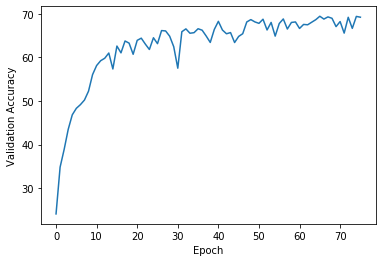


Saved model to model_76.pth. You can run `python evaluate.py --modelmodel_76.pth` to generate the Kaggle formatted csv file
Train Epoch:77 [0/50000 (0%)]	Loss: 0.612788
Train Epoch:77 [640/50000 (1%)]	Loss: 0.677261
Train Epoch:77 [1280/50000 (3%)]	Loss: 1.150369
Train Epoch:77 [1920/50000 (4%)]	Loss: 0.724493
Train Epoch:77 [2560/50000 (5%)]	Loss: 0.567198
Train Epoch:77 [3200/50000 (6%)]	Loss: 0.549387
Train Epoch:77 [3840/50000 (8%)]	Loss: 0.799622
Train Epoch:77 [4480/50000 (9%)]	Loss: 0.866233
Train Epoch:77 [5120/50000 (10%)]	Loss: 0.553644
Train Epoch:77 [5760/50000 (12%)]	Loss: 0.561500
Train Epoch:77 [6400/50000 (13%)]	Loss: 0.993333
Train Epoch:77 [7040/50000 (14%)]	Loss: 0.792439
Train Epoch:77 [7680/50000 (15%)]	Loss: 0.633676
Train Epoch:77 [8320/50000 (17%)]	Loss: 0.863055
Train Epoch:77 [8960/50000 (18%)]	Loss: 0.544119
Train Epoch:77 [9600/50000 (19%)]	Loss: 0.770951
Train Epoch:77 [10240/50000 (20%)]	Loss: 0.683520
Train Epoch:77 [10880/50000 (22%)]	Loss: 0.766716
Tra

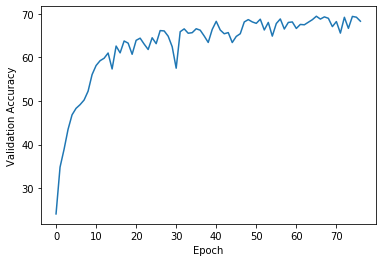


Saved model to model_77.pth. You can run `python evaluate.py --modelmodel_77.pth` to generate the Kaggle formatted csv file
Train Epoch:78 [0/50000 (0%)]	Loss: 0.609670
Train Epoch:78 [640/50000 (1%)]	Loss: 0.632464
Train Epoch:78 [1280/50000 (3%)]	Loss: 0.424610
Train Epoch:78 [1920/50000 (4%)]	Loss: 0.632008
Train Epoch:78 [2560/50000 (5%)]	Loss: 0.685581
Train Epoch:78 [3200/50000 (6%)]	Loss: 0.565852
Train Epoch:78 [3840/50000 (8%)]	Loss: 0.496166
Train Epoch:78 [4480/50000 (9%)]	Loss: 0.754330
Train Epoch:78 [5120/50000 (10%)]	Loss: 0.981080
Train Epoch:78 [5760/50000 (12%)]	Loss: 0.609916
Train Epoch:78 [6400/50000 (13%)]	Loss: 0.714524
Train Epoch:78 [7040/50000 (14%)]	Loss: 0.667603
Train Epoch:78 [7680/50000 (15%)]	Loss: 0.772592
Train Epoch:78 [8320/50000 (17%)]	Loss: 0.896271
Train Epoch:78 [8960/50000 (18%)]	Loss: 0.507583
Train Epoch:78 [9600/50000 (19%)]	Loss: 1.153896
Train Epoch:78 [10240/50000 (20%)]	Loss: 0.646849
Train Epoch:78 [10880/50000 (22%)]	Loss: 0.704397
Tra

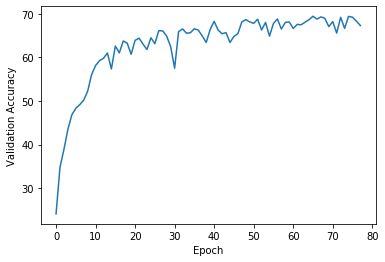


Saved model to model_78.pth. You can run `python evaluate.py --modelmodel_78.pth` to generate the Kaggle formatted csv file
Train Epoch:79 [0/50000 (0%)]	Loss: 0.759335
Train Epoch:79 [640/50000 (1%)]	Loss: 0.714773
Train Epoch:79 [1280/50000 (3%)]	Loss: 0.640135
Train Epoch:79 [1920/50000 (4%)]	Loss: 0.668681
Train Epoch:79 [2560/50000 (5%)]	Loss: 0.491522
Train Epoch:79 [3200/50000 (6%)]	Loss: 0.783661
Train Epoch:79 [3840/50000 (8%)]	Loss: 0.792288
Train Epoch:79 [4480/50000 (9%)]	Loss: 0.546202
Train Epoch:79 [5120/50000 (10%)]	Loss: 0.696064
Train Epoch:79 [5760/50000 (12%)]	Loss: 0.652420
Train Epoch:79 [6400/50000 (13%)]	Loss: 0.867910
Train Epoch:79 [7040/50000 (14%)]	Loss: 0.992028
Train Epoch:79 [7680/50000 (15%)]	Loss: 0.460721
Train Epoch:79 [8320/50000 (17%)]	Loss: 0.678872
Train Epoch:79 [8960/50000 (18%)]	Loss: 0.903421
Train Epoch:79 [9600/50000 (19%)]	Loss: 0.761501
Train Epoch:79 [10240/50000 (20%)]	Loss: 0.861395
Train Epoch:79 [10880/50000 (22%)]	Loss: 0.748168
Tra

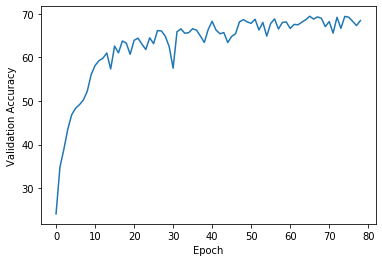


Saved model to model_79.pth. You can run `python evaluate.py --modelmodel_79.pth` to generate the Kaggle formatted csv file
Train Epoch:80 [0/50000 (0%)]	Loss: 0.896283
Train Epoch:80 [640/50000 (1%)]	Loss: 0.731151
Train Epoch:80 [1280/50000 (3%)]	Loss: 0.514024
Train Epoch:80 [1920/50000 (4%)]	Loss: 0.715946
Train Epoch:80 [2560/50000 (5%)]	Loss: 0.706685
Train Epoch:80 [3200/50000 (6%)]	Loss: 0.582056
Train Epoch:80 [3840/50000 (8%)]	Loss: 0.763611
Train Epoch:80 [4480/50000 (9%)]	Loss: 0.563423
Train Epoch:80 [5120/50000 (10%)]	Loss: 0.748183
Train Epoch:80 [5760/50000 (12%)]	Loss: 0.654047
Train Epoch:80 [6400/50000 (13%)]	Loss: 0.601429
Train Epoch:80 [7040/50000 (14%)]	Loss: 0.582106
Train Epoch:80 [7680/50000 (15%)]	Loss: 0.679579
Train Epoch:80 [8320/50000 (17%)]	Loss: 0.629988
Train Epoch:80 [8960/50000 (18%)]	Loss: 0.665491
Train Epoch:80 [9600/50000 (19%)]	Loss: 0.561981
Train Epoch:80 [10240/50000 (20%)]	Loss: 0.740859
Train Epoch:80 [10880/50000 (22%)]	Loss: 0.672700
Tra

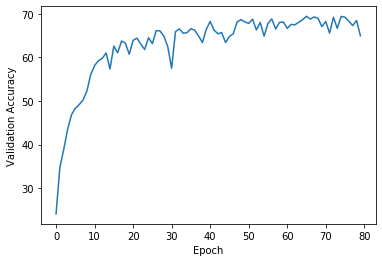


Saved model to model_80.pth. You can run `python evaluate.py --modelmodel_80.pth` to generate the Kaggle formatted csv file
Train Epoch:81 [0/50000 (0%)]	Loss: 0.568769
Train Epoch:81 [640/50000 (1%)]	Loss: 0.674541
Train Epoch:81 [1280/50000 (3%)]	Loss: 0.838004
Train Epoch:81 [1920/50000 (4%)]	Loss: 0.664158
Train Epoch:81 [2560/50000 (5%)]	Loss: 0.525700
Train Epoch:81 [3200/50000 (6%)]	Loss: 0.583340
Train Epoch:81 [3840/50000 (8%)]	Loss: 0.541945
Train Epoch:81 [4480/50000 (9%)]	Loss: 0.693783
Train Epoch:81 [5120/50000 (10%)]	Loss: 0.518094
Train Epoch:81 [5760/50000 (12%)]	Loss: 0.544573
Train Epoch:81 [6400/50000 (13%)]	Loss: 0.642811
Train Epoch:81 [7040/50000 (14%)]	Loss: 0.625501
Train Epoch:81 [7680/50000 (15%)]	Loss: 0.677475
Train Epoch:81 [8320/50000 (17%)]	Loss: 0.744062
Train Epoch:81 [8960/50000 (18%)]	Loss: 0.642437
Train Epoch:81 [9600/50000 (19%)]	Loss: 0.746734
Train Epoch:81 [10240/50000 (20%)]	Loss: 0.404644
Train Epoch:81 [10880/50000 (22%)]	Loss: 0.835132
Tra

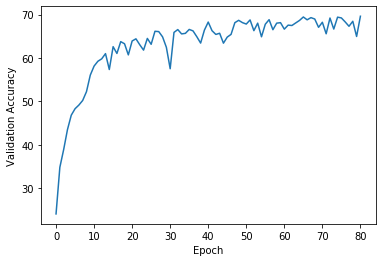


Saved model to model_81.pth. You can run `python evaluate.py --modelmodel_81.pth` to generate the Kaggle formatted csv file
Train Epoch:82 [0/50000 (0%)]	Loss: 0.603506
Train Epoch:82 [640/50000 (1%)]	Loss: 0.669265
Train Epoch:82 [1280/50000 (3%)]	Loss: 0.629796
Train Epoch:82 [1920/50000 (4%)]	Loss: 0.723394
Train Epoch:82 [2560/50000 (5%)]	Loss: 0.702521
Train Epoch:82 [3200/50000 (6%)]	Loss: 0.841822
Train Epoch:82 [3840/50000 (8%)]	Loss: 0.618519
Train Epoch:82 [4480/50000 (9%)]	Loss: 0.699223
Train Epoch:82 [5120/50000 (10%)]	Loss: 0.635189
Train Epoch:82 [5760/50000 (12%)]	Loss: 0.684836
Train Epoch:82 [6400/50000 (13%)]	Loss: 0.771537
Train Epoch:82 [7040/50000 (14%)]	Loss: 0.751160
Train Epoch:82 [7680/50000 (15%)]	Loss: 0.548840
Train Epoch:82 [8320/50000 (17%)]	Loss: 0.639909
Train Epoch:82 [8960/50000 (18%)]	Loss: 0.557468
Train Epoch:82 [9600/50000 (19%)]	Loss: 0.942087
Train Epoch:82 [10240/50000 (20%)]	Loss: 0.520177
Train Epoch:82 [10880/50000 (22%)]	Loss: 0.594580
Tra

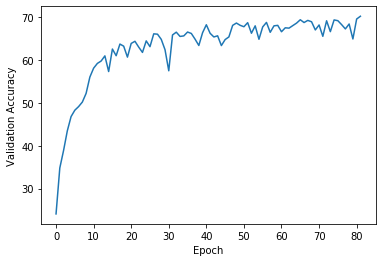


Saved model to model_82.pth. You can run `python evaluate.py --modelmodel_82.pth` to generate the Kaggle formatted csv file
Train Epoch:83 [0/50000 (0%)]	Loss: 0.483772
Train Epoch:83 [640/50000 (1%)]	Loss: 0.595669
Train Epoch:83 [1280/50000 (3%)]	Loss: 0.873019
Train Epoch:83 [1920/50000 (4%)]	Loss: 0.535286
Train Epoch:83 [2560/50000 (5%)]	Loss: 0.745756
Train Epoch:83 [3200/50000 (6%)]	Loss: 0.596451
Train Epoch:83 [3840/50000 (8%)]	Loss: 0.511071
Train Epoch:83 [4480/50000 (9%)]	Loss: 0.692809
Train Epoch:83 [5120/50000 (10%)]	Loss: 0.506313
Train Epoch:83 [5760/50000 (12%)]	Loss: 0.645120
Train Epoch:83 [6400/50000 (13%)]	Loss: 0.609062
Train Epoch:83 [7040/50000 (14%)]	Loss: 0.614604
Train Epoch:83 [7680/50000 (15%)]	Loss: 0.571573
Train Epoch:83 [8320/50000 (17%)]	Loss: 1.028173
Train Epoch:83 [8960/50000 (18%)]	Loss: 0.643819
Train Epoch:83 [9600/50000 (19%)]	Loss: 0.441540
Train Epoch:83 [10240/50000 (20%)]	Loss: 0.385351
Train Epoch:83 [10880/50000 (22%)]	Loss: 0.684230
Tra

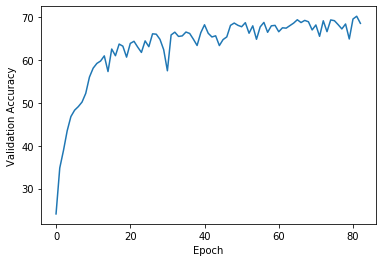


Saved model to model_83.pth. You can run `python evaluate.py --modelmodel_83.pth` to generate the Kaggle formatted csv file
Train Epoch:84 [0/50000 (0%)]	Loss: 0.425687
Train Epoch:84 [640/50000 (1%)]	Loss: 0.683780
Train Epoch:84 [1280/50000 (3%)]	Loss: 0.580402
Train Epoch:84 [1920/50000 (4%)]	Loss: 0.665653
Train Epoch:84 [2560/50000 (5%)]	Loss: 0.741525
Train Epoch:84 [3200/50000 (6%)]	Loss: 0.553320
Train Epoch:84 [3840/50000 (8%)]	Loss: 0.713384
Train Epoch:84 [4480/50000 (9%)]	Loss: 0.745695
Train Epoch:84 [5120/50000 (10%)]	Loss: 0.417363
Train Epoch:84 [5760/50000 (12%)]	Loss: 0.600361
Train Epoch:84 [6400/50000 (13%)]	Loss: 0.609011
Train Epoch:84 [7040/50000 (14%)]	Loss: 0.746448
Train Epoch:84 [7680/50000 (15%)]	Loss: 0.848016
Train Epoch:84 [8320/50000 (17%)]	Loss: 0.997854
Train Epoch:84 [8960/50000 (18%)]	Loss: 0.743064
Train Epoch:84 [9600/50000 (19%)]	Loss: 0.649765
Train Epoch:84 [10240/50000 (20%)]	Loss: 0.844616
Train Epoch:84 [10880/50000 (22%)]	Loss: 0.508852
Tra

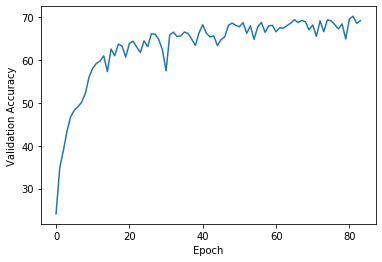


Saved model to model_84.pth. You can run `python evaluate.py --modelmodel_84.pth` to generate the Kaggle formatted csv file
Train Epoch:85 [0/50000 (0%)]	Loss: 0.680652
Train Epoch:85 [640/50000 (1%)]	Loss: 0.707483
Train Epoch:85 [1280/50000 (3%)]	Loss: 0.587686
Train Epoch:85 [1920/50000 (4%)]	Loss: 0.653259
Train Epoch:85 [2560/50000 (5%)]	Loss: 0.575406
Train Epoch:85 [3200/50000 (6%)]	Loss: 0.917870
Train Epoch:85 [3840/50000 (8%)]	Loss: 0.470475
Train Epoch:85 [4480/50000 (9%)]	Loss: 0.502041
Train Epoch:85 [5120/50000 (10%)]	Loss: 0.867500
Train Epoch:85 [5760/50000 (12%)]	Loss: 0.407180
Train Epoch:85 [6400/50000 (13%)]	Loss: 0.517897
Train Epoch:85 [7040/50000 (14%)]	Loss: 0.850886
Train Epoch:85 [7680/50000 (15%)]	Loss: 0.702596
Train Epoch:85 [8320/50000 (17%)]	Loss: 0.606597
Train Epoch:85 [8960/50000 (18%)]	Loss: 0.469561
Train Epoch:85 [9600/50000 (19%)]	Loss: 0.873154
Train Epoch:85 [10240/50000 (20%)]	Loss: 0.615436
Train Epoch:85 [10880/50000 (22%)]	Loss: 0.650653
Tra

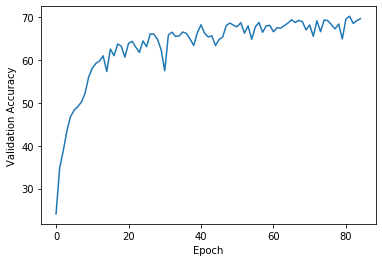


Saved model to model_85.pth. You can run `python evaluate.py --modelmodel_85.pth` to generate the Kaggle formatted csv file
Train Epoch:86 [0/50000 (0%)]	Loss: 0.535550
Train Epoch:86 [640/50000 (1%)]	Loss: 0.580897
Train Epoch:86 [1280/50000 (3%)]	Loss: 0.554567
Train Epoch:86 [1920/50000 (4%)]	Loss: 0.773890
Train Epoch:86 [2560/50000 (5%)]	Loss: 0.482714
Train Epoch:86 [3200/50000 (6%)]	Loss: 0.488086
Train Epoch:86 [3840/50000 (8%)]	Loss: 0.505759
Train Epoch:86 [4480/50000 (9%)]	Loss: 0.703337
Train Epoch:86 [5120/50000 (10%)]	Loss: 0.625277
Train Epoch:86 [5760/50000 (12%)]	Loss: 0.546318
Train Epoch:86 [6400/50000 (13%)]	Loss: 0.507122
Train Epoch:86 [7040/50000 (14%)]	Loss: 0.684056
Train Epoch:86 [7680/50000 (15%)]	Loss: 0.766236
Train Epoch:86 [8320/50000 (17%)]	Loss: 0.569141
Train Epoch:86 [8960/50000 (18%)]	Loss: 0.580933
Train Epoch:86 [9600/50000 (19%)]	Loss: 0.504409
Train Epoch:86 [10240/50000 (20%)]	Loss: 0.900790
Train Epoch:86 [10880/50000 (22%)]	Loss: 0.615225
Tra

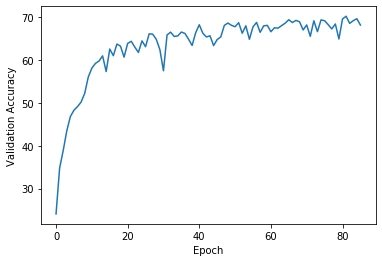


Saved model to model_86.pth. You can run `python evaluate.py --modelmodel_86.pth` to generate the Kaggle formatted csv file
Train Epoch:87 [0/50000 (0%)]	Loss: 0.738726
Train Epoch:87 [640/50000 (1%)]	Loss: 0.795801
Train Epoch:87 [1280/50000 (3%)]	Loss: 0.635411
Train Epoch:87 [1920/50000 (4%)]	Loss: 0.542203
Train Epoch:87 [2560/50000 (5%)]	Loss: 0.764823
Train Epoch:87 [3200/50000 (6%)]	Loss: 0.632503
Train Epoch:87 [3840/50000 (8%)]	Loss: 0.576706
Train Epoch:87 [4480/50000 (9%)]	Loss: 0.618469
Train Epoch:87 [5120/50000 (10%)]	Loss: 0.759652
Train Epoch:87 [5760/50000 (12%)]	Loss: 0.738412
Train Epoch:87 [6400/50000 (13%)]	Loss: 0.450350
Train Epoch:87 [7040/50000 (14%)]	Loss: 0.567258
Train Epoch:87 [7680/50000 (15%)]	Loss: 0.637466
Train Epoch:87 [8320/50000 (17%)]	Loss: 0.681419
Train Epoch:87 [8960/50000 (18%)]	Loss: 0.708940
Train Epoch:87 [9600/50000 (19%)]	Loss: 0.514973
Train Epoch:87 [10240/50000 (20%)]	Loss: 0.718239
Train Epoch:87 [10880/50000 (22%)]	Loss: 0.483224
Tra

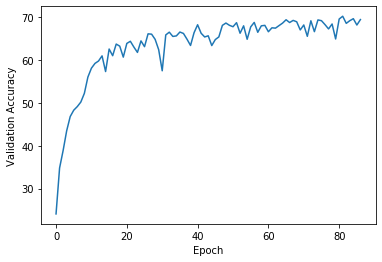


Saved model to model_87.pth. You can run `python evaluate.py --modelmodel_87.pth` to generate the Kaggle formatted csv file
Train Epoch:88 [0/50000 (0%)]	Loss: 0.864583
Train Epoch:88 [640/50000 (1%)]	Loss: 0.608197
Train Epoch:88 [1280/50000 (3%)]	Loss: 0.637699
Train Epoch:88 [1920/50000 (4%)]	Loss: 0.581727
Train Epoch:88 [2560/50000 (5%)]	Loss: 0.828430
Train Epoch:88 [3200/50000 (6%)]	Loss: 0.629999
Train Epoch:88 [3840/50000 (8%)]	Loss: 0.637061
Train Epoch:88 [4480/50000 (9%)]	Loss: 0.585743
Train Epoch:88 [5120/50000 (10%)]	Loss: 0.548725
Train Epoch:88 [5760/50000 (12%)]	Loss: 0.532723
Train Epoch:88 [6400/50000 (13%)]	Loss: 0.626008
Train Epoch:88 [7040/50000 (14%)]	Loss: 0.740257
Train Epoch:88 [7680/50000 (15%)]	Loss: 0.503657
Train Epoch:88 [8320/50000 (17%)]	Loss: 0.616359
Train Epoch:88 [8960/50000 (18%)]	Loss: 0.406443
Train Epoch:88 [9600/50000 (19%)]	Loss: 0.713450
Train Epoch:88 [10240/50000 (20%)]	Loss: 0.535883
Train Epoch:88 [10880/50000 (22%)]	Loss: 0.665279
Tra

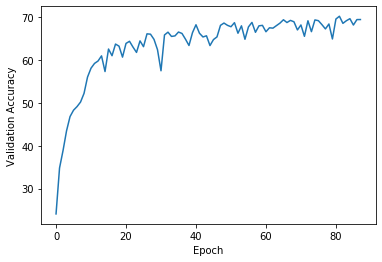


Saved model to model_88.pth. You can run `python evaluate.py --modelmodel_88.pth` to generate the Kaggle formatted csv file
Train Epoch:89 [0/50000 (0%)]	Loss: 0.642980
Train Epoch:89 [640/50000 (1%)]	Loss: 0.470593
Train Epoch:89 [1280/50000 (3%)]	Loss: 0.566770
Train Epoch:89 [1920/50000 (4%)]	Loss: 0.527831
Train Epoch:89 [2560/50000 (5%)]	Loss: 0.787334
Train Epoch:89 [3200/50000 (6%)]	Loss: 0.508177
Train Epoch:89 [3840/50000 (8%)]	Loss: 0.759643
Train Epoch:89 [4480/50000 (9%)]	Loss: 0.492389
Train Epoch:89 [5120/50000 (10%)]	Loss: 0.744270
Train Epoch:89 [5760/50000 (12%)]	Loss: 0.823713
Train Epoch:89 [6400/50000 (13%)]	Loss: 0.531807
Train Epoch:89 [7040/50000 (14%)]	Loss: 0.596442
Train Epoch:89 [7680/50000 (15%)]	Loss: 0.833082
Train Epoch:89 [8320/50000 (17%)]	Loss: 0.532232
Train Epoch:89 [8960/50000 (18%)]	Loss: 0.672395
Train Epoch:89 [9600/50000 (19%)]	Loss: 0.543747
Train Epoch:89 [10240/50000 (20%)]	Loss: 0.609346
Train Epoch:89 [10880/50000 (22%)]	Loss: 0.654219
Tra

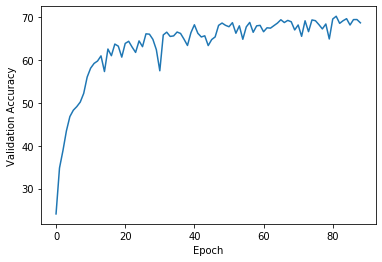


Saved model to model_89.pth. You can run `python evaluate.py --modelmodel_89.pth` to generate the Kaggle formatted csv file
Train Epoch:90 [0/50000 (0%)]	Loss: 0.545521
Train Epoch:90 [640/50000 (1%)]	Loss: 0.894809
Train Epoch:90 [1280/50000 (3%)]	Loss: 0.578030
Train Epoch:90 [1920/50000 (4%)]	Loss: 0.691044
Train Epoch:90 [2560/50000 (5%)]	Loss: 0.504146
Train Epoch:90 [3200/50000 (6%)]	Loss: 0.567377
Train Epoch:90 [3840/50000 (8%)]	Loss: 0.755554
Train Epoch:90 [4480/50000 (9%)]	Loss: 0.696196
Train Epoch:90 [5120/50000 (10%)]	Loss: 0.579814
Train Epoch:90 [5760/50000 (12%)]	Loss: 0.662044
Train Epoch:90 [6400/50000 (13%)]	Loss: 0.541566
Train Epoch:90 [7040/50000 (14%)]	Loss: 0.772678
Train Epoch:90 [7680/50000 (15%)]	Loss: 0.571182
Train Epoch:90 [8320/50000 (17%)]	Loss: 0.697283
Train Epoch:90 [8960/50000 (18%)]	Loss: 0.593108
Train Epoch:90 [9600/50000 (19%)]	Loss: 0.997020
Train Epoch:90 [10240/50000 (20%)]	Loss: 0.581713
Train Epoch:90 [10880/50000 (22%)]	Loss: 0.702014
Tra

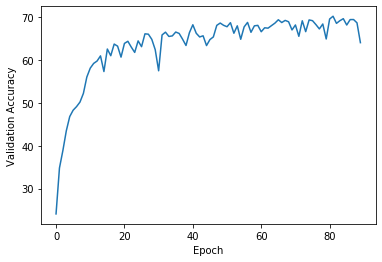


Saved model to model_90.pth. You can run `python evaluate.py --modelmodel_90.pth` to generate the Kaggle formatted csv file
Train Epoch:91 [0/50000 (0%)]	Loss: 0.719700
Train Epoch:91 [640/50000 (1%)]	Loss: 0.796225
Train Epoch:91 [1280/50000 (3%)]	Loss: 0.658552
Train Epoch:91 [1920/50000 (4%)]	Loss: 0.615671
Train Epoch:91 [2560/50000 (5%)]	Loss: 1.055780
Train Epoch:91 [3200/50000 (6%)]	Loss: 0.624399
Train Epoch:91 [3840/50000 (8%)]	Loss: 0.657585
Train Epoch:91 [4480/50000 (9%)]	Loss: 0.620890
Train Epoch:91 [5120/50000 (10%)]	Loss: 0.537066
Train Epoch:91 [5760/50000 (12%)]	Loss: 0.687506
Train Epoch:91 [6400/50000 (13%)]	Loss: 0.719426
Train Epoch:91 [7040/50000 (14%)]	Loss: 0.556563
Train Epoch:91 [7680/50000 (15%)]	Loss: 0.520683
Train Epoch:91 [8320/50000 (17%)]	Loss: 0.734131
Train Epoch:91 [8960/50000 (18%)]	Loss: 0.736652
Train Epoch:91 [9600/50000 (19%)]	Loss: 0.568162
Train Epoch:91 [10240/50000 (20%)]	Loss: 0.636777
Train Epoch:91 [10880/50000 (22%)]	Loss: 0.678598
Tra

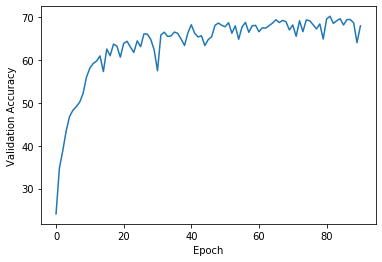


Saved model to model_91.pth. You can run `python evaluate.py --modelmodel_91.pth` to generate the Kaggle formatted csv file
Train Epoch:92 [0/50000 (0%)]	Loss: 0.645477
Train Epoch:92 [640/50000 (1%)]	Loss: 0.750150
Train Epoch:92 [1280/50000 (3%)]	Loss: 0.416301
Train Epoch:92 [1920/50000 (4%)]	Loss: 0.579837
Train Epoch:92 [2560/50000 (5%)]	Loss: 0.480046
Train Epoch:92 [3200/50000 (6%)]	Loss: 0.505751
Train Epoch:92 [3840/50000 (8%)]	Loss: 0.353687
Train Epoch:92 [4480/50000 (9%)]	Loss: 0.482749
Train Epoch:92 [5120/50000 (10%)]	Loss: 0.564046
Train Epoch:92 [5760/50000 (12%)]	Loss: 0.425114
Train Epoch:92 [6400/50000 (13%)]	Loss: 0.428709
Train Epoch:92 [7040/50000 (14%)]	Loss: 0.616538
Train Epoch:92 [7680/50000 (15%)]	Loss: 0.652528
Train Epoch:92 [8320/50000 (17%)]	Loss: 0.741967
Train Epoch:92 [8960/50000 (18%)]	Loss: 0.570748
Train Epoch:92 [9600/50000 (19%)]	Loss: 0.623409
Train Epoch:92 [10240/50000 (20%)]	Loss: 0.839381
Train Epoch:92 [10880/50000 (22%)]	Loss: 0.548526
Tra

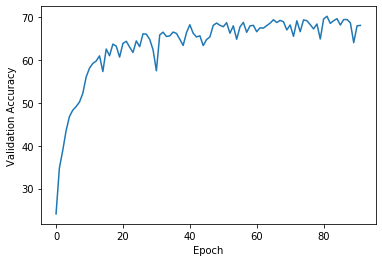


Saved model to model_92.pth. You can run `python evaluate.py --modelmodel_92.pth` to generate the Kaggle formatted csv file
Train Epoch:93 [0/50000 (0%)]	Loss: 0.720096
Train Epoch:93 [640/50000 (1%)]	Loss: 0.441935
Train Epoch:93 [1280/50000 (3%)]	Loss: 0.552886
Train Epoch:93 [1920/50000 (4%)]	Loss: 0.569963
Train Epoch:93 [2560/50000 (5%)]	Loss: 0.621387
Train Epoch:93 [3200/50000 (6%)]	Loss: 0.645694
Train Epoch:93 [3840/50000 (8%)]	Loss: 0.730558
Train Epoch:93 [4480/50000 (9%)]	Loss: 0.558457
Train Epoch:93 [5120/50000 (10%)]	Loss: 0.823850
Train Epoch:93 [5760/50000 (12%)]	Loss: 0.749802
Train Epoch:93 [6400/50000 (13%)]	Loss: 0.801422
Train Epoch:93 [7040/50000 (14%)]	Loss: 0.580719
Train Epoch:93 [7680/50000 (15%)]	Loss: 0.567546
Train Epoch:93 [8320/50000 (17%)]	Loss: 0.879716
Train Epoch:93 [8960/50000 (18%)]	Loss: 0.609153
Train Epoch:93 [9600/50000 (19%)]	Loss: 0.637542
Train Epoch:93 [10240/50000 (20%)]	Loss: 0.571511
Train Epoch:93 [10880/50000 (22%)]	Loss: 0.563317
Tra

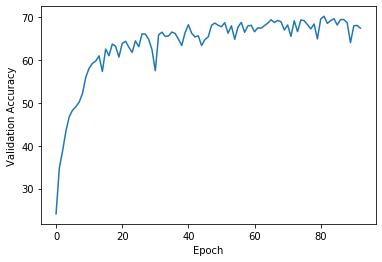


Saved model to model_93.pth. You can run `python evaluate.py --modelmodel_93.pth` to generate the Kaggle formatted csv file
Train Epoch:94 [0/50000 (0%)]	Loss: 0.609295
Train Epoch:94 [640/50000 (1%)]	Loss: 0.685412
Train Epoch:94 [1280/50000 (3%)]	Loss: 0.672388
Train Epoch:94 [1920/50000 (4%)]	Loss: 0.886155
Train Epoch:94 [2560/50000 (5%)]	Loss: 0.466816
Train Epoch:94 [3200/50000 (6%)]	Loss: 0.816340
Train Epoch:94 [3840/50000 (8%)]	Loss: 0.589648
Train Epoch:94 [4480/50000 (9%)]	Loss: 0.701529
Train Epoch:94 [5120/50000 (10%)]	Loss: 0.573968
Train Epoch:94 [5760/50000 (12%)]	Loss: 0.507604
Train Epoch:94 [6400/50000 (13%)]	Loss: 0.446993
Train Epoch:94 [7040/50000 (14%)]	Loss: 0.759526
Train Epoch:94 [7680/50000 (15%)]	Loss: 0.710247
Train Epoch:94 [8320/50000 (17%)]	Loss: 0.499045
Train Epoch:94 [8960/50000 (18%)]	Loss: 0.440209
Train Epoch:94 [9600/50000 (19%)]	Loss: 0.579756
Train Epoch:94 [10240/50000 (20%)]	Loss: 0.626750
Train Epoch:94 [10880/50000 (22%)]	Loss: 0.615372
Tra

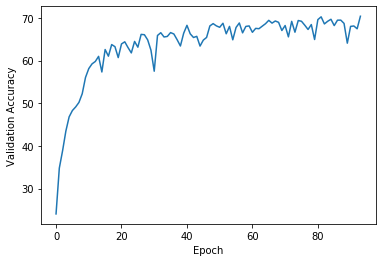


Saved model to model_94.pth. You can run `python evaluate.py --modelmodel_94.pth` to generate the Kaggle formatted csv file
Train Epoch:95 [0/50000 (0%)]	Loss: 0.524354
Train Epoch:95 [640/50000 (1%)]	Loss: 0.696855
Train Epoch:95 [1280/50000 (3%)]	Loss: 0.763066
Train Epoch:95 [1920/50000 (4%)]	Loss: 0.468401
Train Epoch:95 [2560/50000 (5%)]	Loss: 0.482947
Train Epoch:95 [3200/50000 (6%)]	Loss: 0.655613
Train Epoch:95 [3840/50000 (8%)]	Loss: 0.629050
Train Epoch:95 [4480/50000 (9%)]	Loss: 0.654494
Train Epoch:95 [5120/50000 (10%)]	Loss: 0.664666
Train Epoch:95 [5760/50000 (12%)]	Loss: 0.836315
Train Epoch:95 [6400/50000 (13%)]	Loss: 0.597204
Train Epoch:95 [7040/50000 (14%)]	Loss: 0.579684
Train Epoch:95 [7680/50000 (15%)]	Loss: 0.443672
Train Epoch:95 [8320/50000 (17%)]	Loss: 0.704313
Train Epoch:95 [8960/50000 (18%)]	Loss: 0.552233
Train Epoch:95 [9600/50000 (19%)]	Loss: 0.674141
Train Epoch:95 [10240/50000 (20%)]	Loss: 0.761202
Train Epoch:95 [10880/50000 (22%)]	Loss: 0.581123
Tra

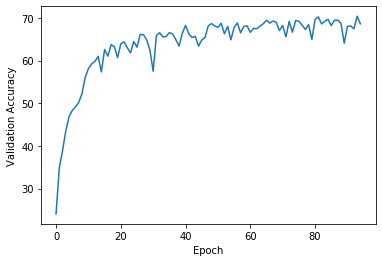


Saved model to model_95.pth. You can run `python evaluate.py --modelmodel_95.pth` to generate the Kaggle formatted csv file
Train Epoch:96 [0/50000 (0%)]	Loss: 0.425855
Train Epoch:96 [640/50000 (1%)]	Loss: 0.548323
Train Epoch:96 [1280/50000 (3%)]	Loss: 0.817331
Train Epoch:96 [1920/50000 (4%)]	Loss: 0.744922
Train Epoch:96 [2560/50000 (5%)]	Loss: 0.832445
Train Epoch:96 [3200/50000 (6%)]	Loss: 0.586097
Train Epoch:96 [3840/50000 (8%)]	Loss: 0.470174
Train Epoch:96 [4480/50000 (9%)]	Loss: 0.566507
Train Epoch:96 [5120/50000 (10%)]	Loss: 0.725703
Train Epoch:96 [5760/50000 (12%)]	Loss: 0.518463
Train Epoch:96 [6400/50000 (13%)]	Loss: 0.543066
Train Epoch:96 [7040/50000 (14%)]	Loss: 0.626318
Train Epoch:96 [7680/50000 (15%)]	Loss: 0.482705
Train Epoch:96 [8320/50000 (17%)]	Loss: 0.682138
Train Epoch:96 [8960/50000 (18%)]	Loss: 0.677889
Train Epoch:96 [9600/50000 (19%)]	Loss: 0.760080
Train Epoch:96 [10240/50000 (20%)]	Loss: 0.556771
Train Epoch:96 [10880/50000 (22%)]	Loss: 0.585990
Tra

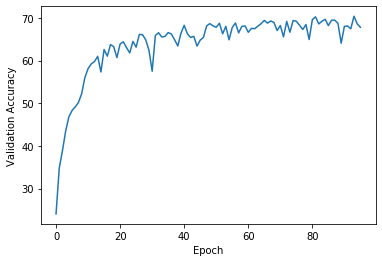


Saved model to model_96.pth. You can run `python evaluate.py --modelmodel_96.pth` to generate the Kaggle formatted csv file
Train Epoch:97 [0/50000 (0%)]	Loss: 0.463554
Train Epoch:97 [640/50000 (1%)]	Loss: 0.607791
Train Epoch:97 [1280/50000 (3%)]	Loss: 0.549874
Train Epoch:97 [1920/50000 (4%)]	Loss: 0.512257
Train Epoch:97 [2560/50000 (5%)]	Loss: 0.768698
Train Epoch:97 [3200/50000 (6%)]	Loss: 0.564740
Train Epoch:97 [3840/50000 (8%)]	Loss: 0.535829
Train Epoch:97 [4480/50000 (9%)]	Loss: 0.837835
Train Epoch:97 [5120/50000 (10%)]	Loss: 0.616519
Train Epoch:97 [5760/50000 (12%)]	Loss: 0.509812
Train Epoch:97 [6400/50000 (13%)]	Loss: 0.721019
Train Epoch:97 [7040/50000 (14%)]	Loss: 0.569063
Train Epoch:97 [7680/50000 (15%)]	Loss: 0.523591
Train Epoch:97 [8320/50000 (17%)]	Loss: 0.626434
Train Epoch:97 [8960/50000 (18%)]	Loss: 0.707003
Train Epoch:97 [9600/50000 (19%)]	Loss: 0.450258
Train Epoch:97 [10240/50000 (20%)]	Loss: 0.508585
Train Epoch:97 [10880/50000 (22%)]	Loss: 0.593546
Tra

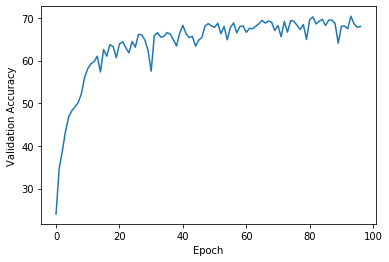


Saved model to model_97.pth. You can run `python evaluate.py --modelmodel_97.pth` to generate the Kaggle formatted csv file
Train Epoch:98 [0/50000 (0%)]	Loss: 0.449284
Train Epoch:98 [640/50000 (1%)]	Loss: 0.513691
Train Epoch:98 [1280/50000 (3%)]	Loss: 0.486530
Train Epoch:98 [1920/50000 (4%)]	Loss: 0.700443
Train Epoch:98 [2560/50000 (5%)]	Loss: 0.626021
Train Epoch:98 [3200/50000 (6%)]	Loss: 0.694463
Train Epoch:98 [3840/50000 (8%)]	Loss: 0.604314
Train Epoch:98 [4480/50000 (9%)]	Loss: 0.404330
Train Epoch:98 [5120/50000 (10%)]	Loss: 0.813975
Train Epoch:98 [5760/50000 (12%)]	Loss: 0.821453
Train Epoch:98 [6400/50000 (13%)]	Loss: 0.763960
Train Epoch:98 [7040/50000 (14%)]	Loss: 1.007752
Train Epoch:98 [7680/50000 (15%)]	Loss: 0.576639
Train Epoch:98 [8320/50000 (17%)]	Loss: 0.865860
Train Epoch:98 [8960/50000 (18%)]	Loss: 0.521852
Train Epoch:98 [9600/50000 (19%)]	Loss: 0.550945
Train Epoch:98 [10240/50000 (20%)]	Loss: 0.687220
Train Epoch:98 [10880/50000 (22%)]	Loss: 0.854815
Tra

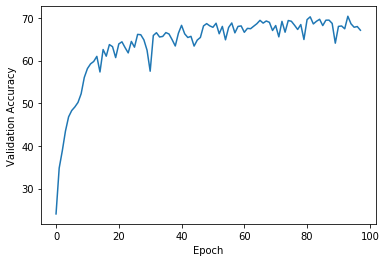


Saved model to model_98.pth. You can run `python evaluate.py --modelmodel_98.pth` to generate the Kaggle formatted csv file
Train Epoch:99 [0/50000 (0%)]	Loss: 0.668260
Train Epoch:99 [640/50000 (1%)]	Loss: 0.665310
Train Epoch:99 [1280/50000 (3%)]	Loss: 0.616460
Train Epoch:99 [1920/50000 (4%)]	Loss: 0.855849
Train Epoch:99 [2560/50000 (5%)]	Loss: 0.496391
Train Epoch:99 [3200/50000 (6%)]	Loss: 0.542129
Train Epoch:99 [3840/50000 (8%)]	Loss: 0.502655
Train Epoch:99 [4480/50000 (9%)]	Loss: 0.871607
Train Epoch:99 [5120/50000 (10%)]	Loss: 0.493912
Train Epoch:99 [5760/50000 (12%)]	Loss: 0.631218
Train Epoch:99 [6400/50000 (13%)]	Loss: 0.564734
Train Epoch:99 [7040/50000 (14%)]	Loss: 0.628628
Train Epoch:99 [7680/50000 (15%)]	Loss: 0.567612
Train Epoch:99 [8320/50000 (17%)]	Loss: 0.654444
Train Epoch:99 [8960/50000 (18%)]	Loss: 0.502172
Train Epoch:99 [9600/50000 (19%)]	Loss: 0.741659
Train Epoch:99 [10240/50000 (20%)]	Loss: 0.746976
Train Epoch:99 [10880/50000 (22%)]	Loss: 0.704295
Tra

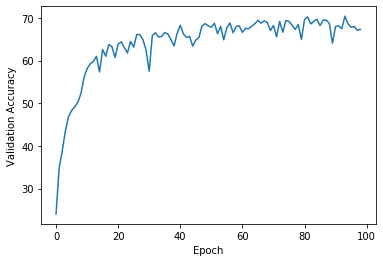


Saved model to model_99.pth. You can run `python evaluate.py --modelmodel_99.pth` to generate the Kaggle formatted csv file
Train Epoch:100 [0/50000 (0%)]	Loss: 0.818804
Train Epoch:100 [640/50000 (1%)]	Loss: 0.329094
Train Epoch:100 [1280/50000 (3%)]	Loss: 0.548263
Train Epoch:100 [1920/50000 (4%)]	Loss: 0.829128
Train Epoch:100 [2560/50000 (5%)]	Loss: 0.607326
Train Epoch:100 [3200/50000 (6%)]	Loss: 0.596200
Train Epoch:100 [3840/50000 (8%)]	Loss: 0.816881
Train Epoch:100 [4480/50000 (9%)]	Loss: 0.535865
Train Epoch:100 [5120/50000 (10%)]	Loss: 0.557397
Train Epoch:100 [5760/50000 (12%)]	Loss: 0.842549
Train Epoch:100 [6400/50000 (13%)]	Loss: 0.478365
Train Epoch:100 [7040/50000 (14%)]	Loss: 0.443867
Train Epoch:100 [7680/50000 (15%)]	Loss: 0.731748
Train Epoch:100 [8320/50000 (17%)]	Loss: 0.553674
Train Epoch:100 [8960/50000 (18%)]	Loss: 0.693972
Train Epoch:100 [9600/50000 (19%)]	Loss: 0.440468
Train Epoch:100 [10240/50000 (20%)]	Loss: 0.423422
Train Epoch:100 [10880/50000 (22%)]	

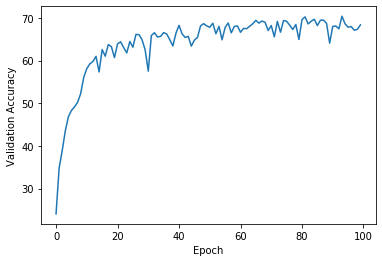


Saved model to model_100.pth. You can run `python evaluate.py --modelmodel_100.pth` to generate the Kaggle formatted csv file


In [3]:
newModel = Net().to(device)

for param in newModel.parameters():
    param.requires_grad = True

Dis = torch.load("./D_200th.pt")

old_model = Discriminator(3)
state_dict = old_model.load_state_dict(Dis)
state_dict = old_model.state_dict()

new_state_dict = newModel.state_dict()

state_dict = {k: v for k, v in state_dict.items() if k in new_state_dict}
new_state_dict.update(state_dict)
newModel.load_state_dict(new_state_dict)

# optimizer = optim.SGD(newModel.parameters(), lr=0.01, momentum=0.5)
optimizer = optim.Adam(newModel.parameters(), lr=0.01)

### For Plot
validation_accuracy = []

def train(epoch):
    newModel.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data).to(device), Variable(target).to(device)
        optimizer.zero_grad()
        output = newModel(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch:{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validation():
    newModel.eval()
    validation_loss = 0
    correct = 0
    for data, target in val_loader:
        data, target = Variable(data, volatile=True).to(device), Variable(target).to(device)
        output = newModel(data)
        validation_loss += F.nll_loss(output, target, size_average=False).data.item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cuda().sum()

    validation_loss /= len(val_loader.dataset)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, correct, len(val_loader.dataset),
        100. * correct / len(val_loader.dataset)))

    ### For Plot
    validation_accuracy.append(100. * correct / len(val_loader.dataset))
    
for epoch in range(1, 100 + 1):
    train(epoch)
    validation()

    ### For Plot
    plt.plot(np.squeeze(validation_accuracy))
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.show()
    
    model_file = 'model_' + str(epoch) + '.pth'
    torch.save(newModel.state_dict(), model_file)
    print('\nSaved model to ' + model_file + '. You can run `python evaluate.py --model' + model_file + '` to generate the Kaggle formatted csv file')



In [4]:
validation_accuracy

[tensor(24.0800, device='cuda:0'),
 tensor(34.8100, device='cuda:0'),
 tensor(38.8900, device='cuda:0'),
 tensor(43.4900, device='cuda:0'),
 tensor(46.8200, device='cuda:0'),
 tensor(48.3100, device='cuda:0'),
 tensor(49.1500, device='cuda:0'),
 tensor(50.2100, device='cuda:0'),
 tensor(52.2400, device='cuda:0'),
 tensor(56.0500, device='cuda:0'),
 tensor(58.1300, device='cuda:0'),
 tensor(59.2400, device='cuda:0'),
 tensor(59.8000, device='cuda:0'),
 tensor(61., device='cuda:0'),
 tensor(57.3400, device='cuda:0'),
 tensor(62.6000, device='cuda:0'),
 tensor(61.0400, device='cuda:0'),
 tensor(63.7600, device='cuda:0'),
 tensor(63.2700, device='cuda:0'),
 tensor(60.7100, device='cuda:0'),
 tensor(63.9100, device='cuda:0'),
 tensor(64.4100, device='cuda:0'),
 tensor(63.0500, device='cuda:0'),
 tensor(61.8100, device='cuda:0'),
 tensor(64.5000, device='cuda:0'),
 tensor(63.1500, device='cuda:0'),
 tensor(66.1500, device='cuda:0'),
 tensor(66.0700, device='cuda:0'),
 tensor(64.8600, device=